# CO PROFILES

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import datetime as dt
import netCDF4 as cdf
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
import pylab as plb
from tm5tools import globarea
import calendar
from math import sqrt
import pickle
from __future__ import division

In [3]:
########################################################## Directories #######################################################

directories = ['/Users/botia/mnt/promise/CO2/ingrid/co_fwd_runs/sibcasa-gfed4/',
              '/Users/botia/mnt/promise/CO2/ingrid/co_fwd_runs/gfas/',
              '/Users/botia/mnt/promise/CO2/ingrid/co_fwd_runs/finn/',
              '/Users/botia/mnt/promise/CO2/ingrid/co_fwd_runs/casa-gfed4/'
              ]


In [4]:
# Root mean square function

def rmse(simulations, observations):
    simulations = np.array(simulations)
    observations = np.array(observations)
    differences = simulations - observations                       #the DIFFERENCEs.
    differences_squared = differences ** 2                    #the SQUAREs of ^
    differences_squared = differences_squared[numpy.logical_not(numpy.isnan(differences_squared))]
    mean_of_differences_squared = differences_squared.mean()  #the MEAN of ^
    rmse_val = np.sqrt(mean_of_differences_squared)           #ROOT of ^
    return rmse_val


In [5]:
### Overview of how many obs were done in each 500 m interval from 0-4500 m - For the period 201001-201406
### change site 'tab' etc o
site = 'rba' # alf, rba, san, tab

f_ex = cdf.Dataset('/Users/botia/mnt/promise/CO2/ingrid/co_fwd_runs/sibcasa-gfed4/gatti_points_apri.nc4')

obses = f_ex.groups[site].groups['CO'].variables['obs_mix'][:]
simus = f_ex.groups[site].groups['CO'].variables['mod_mix'][:]
alts  = f_ex.groups[site].groups['CO'].variables['alt'][:]
times = f_ex.groups[site].groups['CO'].variables['dates'][:]

index = np.where(alts<4500)

altura = alts[index] # type numpy array
observs = obses[index]
simulas = simus[index]
alt_sel = set(altura) # type = set 
alt_sel = sorted(alt_sel) # type= list
avg = []
avg_sim = []
obs_bin = []

print times
for h in range(len(alt_sel)):
    obs_same_height = []
    sim_same_height = []
    for i in range(len(altura)):
        if alt_sel[h] == altura[i]:
            obs_same_height.append(observs[i])
            sim_same_height.append(simulas[i])
            
    obs_bin.append(len(obs_same_height))
        #print alt_sel[h], obs_bin

    if alt_sel[h] < 500:
        obs_500 = sum(obs_bin)

    if 500 < alt_sel[h] < 1000:
        obs_1000 = sum(obs_bin)-obs_500

    if 1000 < alt_sel[h] < 1500:
        obs_1500 = sum(obs_bin)-obs_500-obs_1000

    if 1500 < alt_sel[h] < 2000:
        obs_2000 = sum(obs_bin)-obs_500-obs_1000-obs_1500

    if 2000 < alt_sel[h] < 2500:
        obs_2500 = sum(obs_bin)-obs_500-obs_1000-obs_1500-obs_2000

    if 2500 < alt_sel[h] < 3000:
        obs_3000 = sum(obs_bin)-obs_500-obs_1000-obs_1500-obs_2000-obs_2500

    if 3000 < alt_sel[h] < 3500:
        obs_3500 = sum(obs_bin)-obs_500-obs_1000-obs_1500-obs_2000-obs_2500-obs_3000

    if 3500 < alt_sel[h] < 4000:
        obs_4000 = sum(obs_bin)-obs_500-obs_1000-obs_1500-obs_2000-obs_2500-obs_3000-obs_3500

    if 4000 < alt_sel[h] < 4500:
        obs_4500 = sum(obs_bin)-obs_500-obs_1000-obs_1500-obs_2000-obs_2500-obs_3000-obs_3500-obs_4000

print obs_500,obs_1000,obs_1500,obs_2000,obs_2500,obs_3000,obs_3500,obs_4000,obs_4500

[[2010    1    8   17    0    0]
 [2010    1    8   17    8    0]
 [2010    1    8   17   15    0]
 ..., 
 [2014    6   30   16   49    0]
 [2014    6   30   16   53    0]
 [2014    6   30   16   57    0]]
74 158 86 167 82 82 88 156 84


# Observation Analysis 
- Plotting all seasons on one graph: all year, wet and fire season observations

2010 [35, 56, 37, 37, 31, 26, 31, 38, 24] [27, 41, 28, 27, 26, 16, 26, 28, 16] [8, 15, 9, 10, 5, 10, 5, 10, 8]
2011 [44, 66, 44, 44, 23, 46, 23, 44, 46] [26, 39, 26, 26, 14, 28, 14, 27, 28] [18, 27, 18, 18, 9, 18, 9, 17, 18]
2012 [48, 72, 48, 48, 24, 48, 24, 48, 47] [28, 42, 28, 28, 14, 28, 14, 28, 28] [20, 30, 20, 20, 10, 20, 10, 20, 19]
2013 [42, 67, 46, 46, 23, 46, 23, 44, 46] [26, 39, 26, 26, 13, 26, 13, 25, 26] [16, 28, 20, 20, 10, 20, 10, 19, 20]
2014 [13, 21, 13, 14, 7, 14, 7, 14, 14] [13, 21, 13, 14, 7, 14, 7, 14, 14] [0, 0, 0, 0, 0, 0, 0, 0, 0]


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


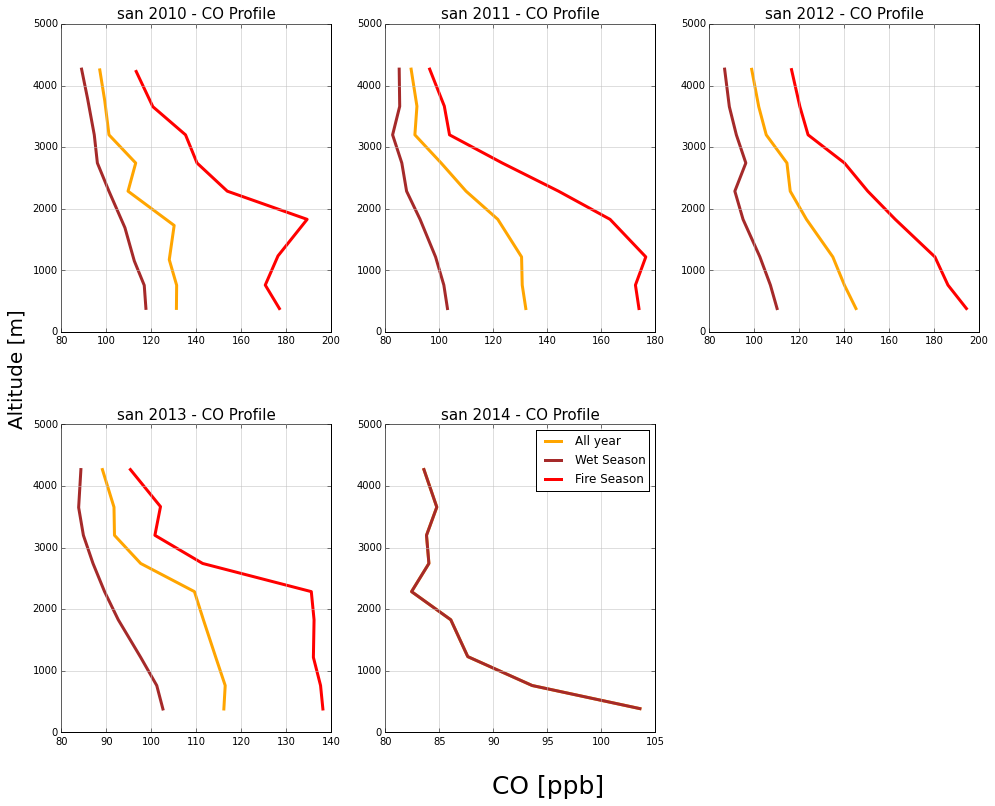

In [6]:

site = 'san' # change to check all sites

minyear = 2010
maxyear = 2015

fig,axes = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(15,12))
subplots_adjust(left=0.05, bottom=0.08, right=None, top=None, wspace=None, hspace=0.3)
fig.text(0, 0.5, 'Altitude [m]', va='center', rotation='vertical',fontsize=20)
fig.text(0.5, 0.009, 'CO [ppb]', ha='center',fontsize=25)

colors = plt.get_cmap('gist_rainbow')(np.linspace(0,1,6))

dirbf = '/Users/botia/mnt/promise/CO2/ingrid/co_fwd_runs/sibcasa-gfed4/gatti_points_apri.nc4'
      
f = cdf.Dataset(dirbf)    
o = f.groups[site].groups['CO'].variables['obs_mix'][:]
s = f.groups[site].groups['CO'].variables['mod_mix'][:]
a = f.groups[site].groups['CO'].variables['alt'][:]
time = f.groups[site].groups['CO'].variables['dates'][:]
dates = []

for i in time:
    dates.append(dt.datetime(*i))
dates = np.array(dates)
                
for y in range(minyear,maxyear):
    # To look at individual years
    date_min = dt.datetime(y,1,1)
    date_max = dt.datetime(y+1,1,1)
                
    # wet season
    date_min_wet = dt.datetime(y,1,1)
    date_max_wet = dt.datetime(y,8,1)
                
    # fire season
    date_min_fire = dt.datetime(y,8,1)
    date_max_fire = dt.datetime(y+1,1,1)
                
    d_index_all  = np.where(np.logical_and(dates >= date_min, dates < date_max))
    d_index_fire = np.where(np.logical_and(dates >= date_min_fire, dates < date_max_fire))
    d_index_wet  = np.where(np.logical_and(dates >= date_min_wet, dates < date_max_wet))
        
    obs = o[d_index_all]
    sim = s[d_index_all]
    alt = a[d_index_all]
                
    # wet season obs and sims
    obs_wet = o[d_index_wet]
    sim_wet = s[d_index_wet]
    alt_wet = a[d_index_wet]
                
    # fire season obs and sims
    obs_fire = o[d_index_fire]
    sim_fire = s[d_index_fire]
    alt_fire = a[d_index_fire]
                
    index_500 = np.where(alt<500)
    index_1000 = np.where(np.logical_and(alt>=500,alt<1000))
    index_1500 = np.where(np.logical_and(alt>=1000,alt<1500))
    index_2000 = np.where(np.logical_and(alt>=1500,alt<2000))
    index_2500 = np.where(np.logical_and(alt>=2000,alt<2500))
    index_3000 = np.where(np.logical_and(alt>=2500,alt<3000))
    index_3500 = np.where(np.logical_and(alt>=3000,alt<3500))
    index_4000 = np.where(np.logical_and(alt>=3500,alt<4000))
    index_4500 = np.where(np.logical_and(alt>=4000,alt<4500))

    index_500_wet = np.where(alt_wet<500)
    index_1000_wet = np.where(np.logical_and(alt_wet>=500,alt_wet<1000))
    index_1500_wet = np.where(np.logical_and(alt_wet>=1000,alt_wet<1500))
    index_2000_wet = np.where(np.logical_and(alt_wet>=1500,alt_wet<2000))
    index_2500_wet = np.where(np.logical_and(alt_wet>=2000,alt_wet<2500))
    index_3000_wet = np.where(np.logical_and(alt_wet>=2500,alt_wet<3000))
    index_3500_wet = np.where(np.logical_and(alt_wet>=3000,alt_wet<3500))
    index_4000_wet = np.where(np.logical_and(alt_wet>=3500,alt_wet<4000))
    index_4500_wet = np.where(np.logical_and(alt_wet>=4000,alt_wet<4500))

    index_500_fire = np.where(alt_fire<500)
    index_1000_fire = np.where(np.logical_and(alt_fire>=500,alt_fire<1000))
    index_1500_fire = np.where(np.logical_and(alt_fire>=1000,alt_fire<1500))
    index_2000_fire = np.where(np.logical_and(alt_fire>=1500,alt_fire<2000))
    index_2500_fire = np.where(np.logical_and(alt_fire>=2000,alt_fire<2500))
    index_3000_fire = np.where(np.logical_and(alt_fire>=2500,alt_fire<3000))
    index_3500_fire = np.where(np.logical_and(alt_fire>=3000,alt_fire<3500))
    index_4000_fire = np.where(np.logical_and(alt_fire>=3500,alt_fire<4000))
    index_4500_fire = np.where(np.logical_and(alt_fire>=4000,alt_fire<4500))

    indices      = [index_500,index_1000,index_1500,index_2000,index_2500,index_3000,
                    index_3500,index_4000,index_4500]   

    indices_wet  = [index_500_wet,index_1000_wet,index_1500_wet,index_2000_wet,index_2500_wet,index_3000_wet,
                    index_3500_wet,index_4000_wet,index_4500_wet]

    indices_fire = [index_500_fire,index_1000_fire,index_1500_fire,index_2000_fire,index_2500_fire,index_3000_fire,
                    index_3500_fire,index_4000_fire,index_4500_fire]

    obs_bin      = [len(obs[index_500]), len(obs[index_1000]),  len(obs[index_1500]), 
                   len(obs[index_2000]), len(obs[index_2500]), len(obs[index_3000]),
                   len(obs[index_3500]), len(obs[index_4000]), len(obs[index_4500])]
    
    obs_bin_wet  = [len(obs_wet[index_500_wet]), len(obs_wet[index_1000_wet]),  len(obs_wet[index_1500_wet]), 
                   len(obs_wet[index_2000_wet]), len(obs_wet[index_2500_wet]), len(obs_wet[index_3000_wet]),
                   len(obs_wet[index_3500_wet]), len(obs_wet[index_4000_wet]), len(obs_wet[index_4500_wet])]
    
    obs_bin_fire = [len(obs_fire[index_500_fire]), len(obs_fire[index_1000_fire]),  len(obs_fire[index_1500_fire]), 
                   len(obs_fire[index_2000_fire]), len(obs_fire[index_2500_fire]), len(obs_fire[index_3000_fire]),
                   len(obs_fire[index_3500_fire]), len(obs_fire[index_4000_fire]), len(obs_fire[index_4500_fire])]

    # activate to see the number of observations in each height per year
    print y, obs_bin, obs_bin_wet, obs_bin_fire

    observations = [] 
    obs_fire_alt = []
    obs_wet_alt  = []

    altitude     = []
    alt_fire_alt = []
    alt_wet_alt  = []
                
    for x in range(len(indices)):
        observations.append((obs[indices[x]]).mean())
        obs_fire_alt.append((obs_fire[indices_fire[x]]).mean())
        obs_wet_alt.append((obs_wet[indices_wet[x]]).mean())

        altitude.append((alt[indices[x]]).mean())
        alt_fire_alt.append((alt_fire[indices_fire[x]]).mean())
        alt_wet_alt.append((alt_wet[indices_wet[x]]).mean())

    labels = ['All year', 'Wet Season', 'Fire Season']

    if y == 2010: 
        ax1 = plt.subplot(231)
        ax1.plot(observations, altitude, color = 'orange', label=labels[0],linewidth = 3)
        ax1.plot(obs_wet_alt, alt_wet_alt, color = 'brown',label=labels[1],linewidth = 3)
        ax1.plot(obs_fire_alt, alt_fire_alt, color = 'red',label=labels[2],linewidth = 3)
        #ax1.legend(loc = 'upper right')
    if y == 2011: 
        ax1 = plt.subplot(232)
        ax1.plot(observations, altitude, color = 'orange', label=labels[0],linewidth = 3)
        ax1.plot(obs_wet_alt, alt_wet_alt, color = 'brown',label=labels[1],linewidth = 3)
        ax1.plot(obs_fire_alt, alt_fire_alt, color = 'red',label=labels[2],linewidth = 3)
    if y == 2012: 
        ax1 = plt.subplot(233)
        ax1.plot(observations, altitude, color = 'orange', label=labels[0],linewidth = 3)
        ax1.plot(obs_wet_alt, alt_wet_alt, color = 'brown',label=labels[1],linewidth = 3)
        ax1.plot(obs_fire_alt, alt_fire_alt, color = 'red',label=labels[2],linewidth = 3)
        #ax1.legend(loc = 'upper right')
    if y == 2013: 
        ax1 = plt.subplot(234)
        ax1.plot(observations, altitude, color = 'orange',linewidth = 3)
        ax1.plot(obs_wet_alt, alt_wet_alt,color = 'brown',linewidth = 3)
        ax1.plot(obs_fire_alt, alt_fire_alt,color = 'red',linewidth = 3)
    if y == 2014:
        ax1 = plt.subplot(235)
        ax1.plot(observations, altitude, color = 'orange', label=labels[0],linewidth = 3)
        ax1.plot(obs_wet_alt, alt_wet_alt, color = 'brown',label=labels[1],linewidth = 3)
        ax1.plot(obs_fire_alt, alt_fire_alt, color = 'red',label=labels[2],linewidth = 3)
        ax1.legend(loc = 'upper right')

    ax1.set_title('%s %i - CO Profile'%(site,y),fontsize=15)
    ax1.grid(True, ls='-', color='0.75') # setting the grid and the color on a black scale
    ax1.set_ylim(0,5000)
    ax1 = plt.subplot(236)
                    
t1 = [0]*9
t2 = [0]*9
ax1 = plt.subplot(236)
ax1.plot(t1,t2,'-')
ax1.legend(bbox_to_anchor=(0.7, 0.7)) 
ax1.legend(bbox_to_anchor=(2, 0.7))
ax1.tick_params(axis='x', which='both',bottom='off',top='off',labelbottom='off')
ax1.tick_params(axis='y', which='both',left='off',right='off',labelleft='off')
ax1.spines['right'].set_color('none')
ax1.spines['left'].set_color('none')
ax1.spines['bottom'].set_color('none')
ax1.spines['top'].set_color('none')

In [9]:
def sizes_gen(site,season):
    '''Function that returns the sizes of the markers to plot for each height, at each site and for each season'''    
    maxs        = [ ]
    mins        = [ ]
    sizes_2010  = [ ]
    sizes_2011  = [ ]
    sizes_2012  = [ ]
    sizes_2013  = [ ]
    sizes_2014  = [ ]
    obs_all_yrs = [ ]

    minyear = 2010
    maxyear = 2015

    if site == 'san':
        obs_all  = pickle.load( open( "san_obs_all.pickle", "rb" ) )
        obs_fire = pickle.load( open( "san_obs_fire.pickle", "rb" ) )
        obs_wet  = pickle.load( open( "san_obs_wet.pickle", "rb" ) )
    if site == 'rba':
        obs_all  = pickle.load( open( "rbo_obs_all.pickle", "rb" ) )
        obs_fire = pickle.load( open( "rbo_obs_fire.pickle", "rb" ) )
        obs_wet  = pickle.load( open( "rbo_obs_wet.pickle", "rb" ) )
    if site == 'alf':
        obs_all  = pickle.load( open( "alf_obs_all.pickle", "rb" ) )
        obs_fire = pickle.load( open( "alf_obs_fire.pickle", "rb" ) )
        obs_wet  = pickle.load( open( "alf_obs_wet.pickle", "rb" ) )   
    if site == 'tab':
        obs_all  = pickle.load( open( "tab_obs_all.pickle", "rb" ) )
        obs_fire = pickle.load( open( "tab_obs_fire.pickle", "rb" ) )
        obs_wet  = pickle.load( open( "tab_obs_wet.pickle", "rb" ) )

    if season == 'fire':
        maxyear = 2014
        for y in range(minyear,maxyear):
            maxs.append(max(obs_fire['%i'%(y)]))
            mins.append(min(obs_fire['%i'%(y)]))
            ran = range(min(mins),max(maxs)+1)
        cont = 0
        for year in range(minyear,maxyear):
            for i in range(9):
                elem = obs_fire['%i'%(year)][i]
                obs_all_yrs.insert(cont, elem)
                cont += 1
                for j in range(len(ran)):
                    if elem == ran[j] and year == 2010:
                        sizes_2010.append((j+1)/len(ran)*100)
                    if elem == ran[j] and year == 2011:
                        sizes_2011.append((j+1)/len(ran)*100)
                    if elem == ran[j] and year == 2012:
                        sizes_2012.append((j+1)/len(ran)*100)
                    if elem == ran[j] and year == 2013:
                        sizes_2013.append((j+1)/len(ran)*100)
        #print season, site, sizes_2010,sizes_2011,sizes_2014
        return np.array([sizes_2010, sizes_2011, sizes_2012, sizes_2013]),obs_all_yrs
    
    if season == 'wet':
        for y in range(minyear,maxyear):
            maxs.append(max(obs_wet['%i'%(y)]))
            mins.append(min(obs_wet['%i'%(y)]))
            ran = range(min(mins),max(maxs)+1)
        cont = 0
        for year in range(minyear,maxyear):
            for i in range(9):
                elem = obs_wet['%i'%(year)][i]
                obs_all_yrs.insert(cont, elem)
                cont += 1
                for j in range(len(ran)):
                    if elem == ran[j] and year == 2010:
                        sizes_2010.append((j+1)/len(ran)*100)
                    if elem == ran[j] and year == 2011:
                        sizes_2011.append((j+1)/len(ran)*100)
                    if elem == ran[j] and year == 2012:
                        sizes_2012.append((j+1)/len(ran)*100)
                    if elem == ran[j] and year == 2013:
                        sizes_2013.append((j+1)/len(ran)*100)
                    if elem == ran[j] and year == 2014:
                        sizes_2014.append((j+1)/len(ran)*100)
        #print sizes_2010,sizes_2011
        return np.array([sizes_2010, sizes_2011, sizes_2012, sizes_2013, sizes_2014]), obs_all_yrs
    
    if season == 'all':
        for y in range(minyear,maxyear):
            maxs.append(max(obs_all['%i'%(y)]))
            mins.append(min(obs_all['%i'%(y)]))
            ran = range(min(mins),max(maxs)+1)
        cont = 0
        for year in range(minyear,maxyear):
            for i in range(9):
                elem = obs_all['%i'%(year)][i]
                obs_all_yrs.insert(cont, elem)
                cont += 1
                for j in range(len(ran)):
                    if elem == ran[j] and year == 2010:
                        sizes_2010.append((j+1)/len(ran)*100)
                    if elem == ran[j] and year == 2011:
                        sizes_2011.append((j+1)/len(ran)*100)
                    if elem == ran[j] and year == 2012:
                        sizes_2012.append((j+1)/len(ran)*100)
                    if elem == ran[j] and year == 2013:
                        sizes_2013.append((j+1)/len(ran)*100)
                    if elem == ran[j] and year == 2014:
                        sizes_2014.append((j+1)/len(ran)*100)
        
        return np.array([sizes_2010, sizes_2011, sizes_2012, sizes_2013, sizes_2014]), obs_all_yrs

In [10]:
def legend_gen(site,season):
    all_sizes = []
    otser = sizes_gen(site,season)[1]     # observations called from sizes_gen func
    sizes_arr = sizes_gen(site,season)[0] # sizes_array called form sizes_gen func
    t2 = np.array(range(min(otser),max(otser)+1))
    num = len(t2)
    
    for j in t2:
        all_sizes.append((j+1)/len(t2)*100)
    t = np.array([10*n for n in all_sizes])

    if num%6 == 0:
        ste = int(num/6)
        print t2
        index1    = np.where(np.logical_and(t2>=t2[0],t2<t2[0+ste]))
        index2    = np.where(np.logical_and(t2>=t2[0+ste],t2<t2[0+ste*2]))
        index3    = np.where(np.logical_and(t2>=t2[0+ste*2],t2<t2[0+ste*3]))
        index4    = np.where(np.logical_and(t2>=t2[0+ste*3],t2<t2[0+ste*4]))
        index5    = np.where(np.logical_and(t2>=t2[0+ste*4],t2<t2[0+ste*5]))
        index6    = np.where(np.logical_and(t2>=t2[0+ste*5],t2<=max(t2)))

        labels    = ['','','','','','']
        labels[0] = 'Obs:%s-%s'%(str(min(t2[index1])), str(max(t2[index1]))) 
        labels[1] = 'Obs:%s-%s'%(str(min(t2[index2])), str(max(t2[index2])))
        labels[2] = 'Obs:%s-%s'%(str(min(t2[index3])), str(max(t2[index3])))
        labels[3] = 'Obs:%s-%s'%(str(min(t2[index4])), str(max(t2[index4]))) 
        labels[4] = 'Obs:%s-%s'%(str(min(t2[index5])), str(max(t2[index5])))
        labels[5] = 'Obs:%s-%s'%(str(min(t2[index6])), str(max(t2[index6])))

        indices   = [index1,index2,index3,index4,index5,index6]
        
        return indices, labels, t, t2
        
    else:
        remainder  = num%6
        adj        = 6 - remainder
        adjust_ran = num + adj
        ste        = int(adjust_ran/6)
        to_add     = [1]*adj 
        to_add2    = [max(t2)+i+1 for i,j in enumerate(to_add)]
        to_add3    = [max(t)+i+1 for i,j in enumerate(to_add)]
        t3         = np.insert(t2,len(t2),to_add2)
        t1         = np.insert(t,len(t),to_add3)
        index1     = np.where(np.logical_and(t3>=t3[0],t3<t3[0+ste]))
        index2     = np.where(np.logical_and(t3>=t3[0+ste],t3<t3[0+ste*2]))
        index3     = np.where(np.logical_and(t3>=t3[0+ste*2],t3<t3[0+ste*3]))
        index4     = np.where(np.logical_and(t3>=t3[0+ste*3],t3<t3[0+ste*4]))
        index5     = np.where(np.logical_and(t3>=t3[0+ste*4],t3<t3[0+ste*5]))
        index6     = np.where(np.logical_and(t3>=t3[0+ste*5],t3<=max(t3)))

        labels = ['','','','','','']
        labels[0] = 'Obs:%s-%s'%(str(min(t3[index1])), str(max(t3[index1]))) 
        labels[1] = 'Obs:%s-%s'%(str(min(t3[index2])), str(max(t3[index2])))
        labels[2] = 'Obs:%s-%s'%(str(min(t3[index3])), str(max(t3[index3])))
        labels[3] = 'Obs:%s-%s'%(str(min(t3[index4])), str(max(t3[index4]))) 
        labels[4] = 'Obs:%s-%s'%(str(min(t3[index5])), str(max(t3[index5])))
        labels[5] = 'Obs:%s-%s'%(str(min(t3[index6])), str(max(t3[index6])))

        indices = [index1,index2,index3,index4,index5,index6]
        
        return indices, labels, t1, t3

# SANTAREM ALL YEAR, FIRE AND WET SEASONS
 - Box whiskers can be plotted as well as errorbars 
 - RMSE can also be calculated for each year
 - Option 1: observations alone with variability and other plot with only lines of simulations and observations
 - Option 2: Everything together with errorbars (25-75%)
 - Option 3: Everything together with boxplot, this options leaves some outliers outside due to the x-axis stretching to gain more detail

0 /Users/botia/mnt/promise/CO2/ingrid/co_fwd_runs/sibcasa-gfed4/
/Users/botia/mnt/promise/CO2/ingrid/co_fwd_runs/sibcasa-gfed4/gatti_points_apri.nc4
1 /Users/botia/mnt/promise/CO2/ingrid/co_fwd_runs/gfas/
/Users/botia/mnt/promise/CO2/ingrid/co_fwd_runs/gfas/gatti_points_apri.nc4
2 /Users/botia/mnt/promise/CO2/ingrid/co_fwd_runs/finn/
/Users/botia/mnt/promise/CO2/ingrid/co_fwd_runs/finn/gatti_points_apri.nc4
3 /Users/botia/mnt/promise/CO2/ingrid/co_fwd_runs/casa-gfed4/
/Users/botia/mnt/promise/CO2/ingrid/co_fwd_runs/casa-gfed4/gatti_points_apri.nc4
[ 7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37 38 39 40 41 42]
36 36


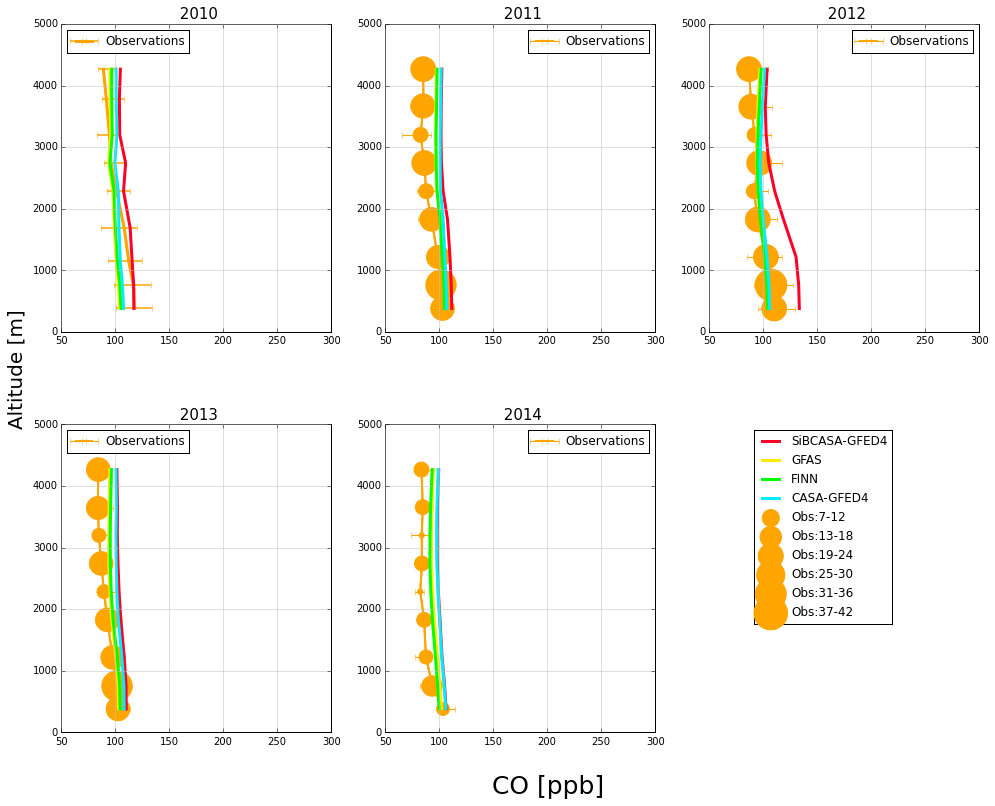

In [21]:
site = 'san'
season  = 'wet'
minyear = 2010
maxyear = 2015
boxplot = False # False to plot errorbars

fig,axes = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(15,12))
subplots_adjust(left=0.05, bottom=0.08, right=None, top=None, wspace=None, hspace=0.3)
fig.text(0, 0.5, 'Altitude [m]', va='center', rotation='vertical',fontsize=20)
fig.text(0.5, 0.009, 'CO [ppb]', ha='center',fontsize=25)

colors = plt.get_cmap('gist_rainbow')(np.linspace(0,1,6))
legend = ['SiBCASA-GFED4','GFAS','FINN','CASA-GFED4','CASA-GFED4-3h','Observations']

filas   = pd.Series(['SiBCASA-GFED4','GFAS','FINN','CASA-GFED4'])
df_all  = pd.DataFrame(np.zeros((4,5)),index=filas, columns=('2010','2011','2012','2013','2014'))
df_fire = pd.DataFrame(np.zeros((4,5)),index=filas, columns=('2010','2011','2012','2013','2014'))
df_wet  = pd.DataFrame(np.zeros((4,5)),index=filas, columns=('2010','2011','2012','2013','2014'))

if season == 'fire': maxyear = 2014
for ii,dirbf in enumerate(directories):
    print ii,dirbf
    for fname in os.listdir(dirbf):
        print dirbf+fname
        f = cdf.Dataset(dirbf+fname)
        o = f.groups[site].groups['CO'].variables['obs_mix'][:]            
        s = f.groups[site].groups['CO'].variables['mod_mix'][:]
        a = f.groups[site].groups['CO'].variables['alt'][:]
        time = f.groups[site].groups['CO'].variables['dates'][:]
        
        dates = []
        for i in time:
            dates.append(dt.datetime(*i))
        dates = np.array(dates)

        for y in range(minyear,maxyear):
            if season == 'all':
                date_min = dt.datetime(y,1,1)
                date_max = dt.datetime(y+1,1,1)
            if season == 'wet':
                date_min = dt.datetime(y,1,1)
                date_max = dt.datetime(y,8,1)
            if season == 'fire':
                date_min = dt.datetime(y,8,1)
                date_max = dt.datetime(y,12,1)

            d_index = np.where(np.logical_and(dates>=date_min,dates<date_max))

            obs = o[d_index]
            sim = s[d_index]
            alt = a[d_index]

            index_500 = np.where(alt<500)
            index_1000 = np.where(np.logical_and(alt>=500,alt<1000))
            index_1500 = np.where(np.logical_and(alt>=1000,alt<1500))
            index_2000 = np.where(np.logical_and(alt>=1500,alt<2000))
            index_2500 = np.where(np.logical_and(alt>=2000,alt<2500))
            index_3000 = np.where(np.logical_and(alt>=2500,alt<3000))
            index_3500 = np.where(np.logical_and(alt>=3000,alt<3500))
            index_4000 = np.where(np.logical_and(alt>=3500,alt<4000))
            index_4500 = np.where(np.logical_and(alt>=4000,alt<4500))

            indices = [index_500,index_1000,index_1500,index_2000,index_2500,index_3000,
                       index_3500,index_4000,index_4500]    

            obs_bin = [len(obs[index_500]), len(obs[index_1000]),  len(obs[index_1500]), 
                       len(obs[index_2000]), len(obs[index_2500]), len(obs[index_3000]),
                       len(obs[index_3500]), len(obs[index_4000]), len(obs[index_4500])]

            # activate to see the number of observations in each height per year
            #print y, obs_bin

            observations  = []
            simulations   = []
            error_low     = []
            error_high    = []
            obs_count     = []
            altitude      = []
            info_point2   = []

            for x in range(len(indices)):
                simulations.append((sim[indices[x]]).mean())
                observations.append((obs[indices[x]]).mean())
                error_low.append(np.median(obs[indices[x]]) - np.percentile(obs[indices[x]],25.0))
                error_high.append(np.percentile(obs[indices[x]],75.0) - np.median(obs[indices[x]]))
                obs_count.append(len(obs[indices[x]]))   
                altitude.append(alt[indices[x]].mean())
                info_point2 += [[obs[indices[x]]]]

            altitude = np.array([int(elem) for elem in altitude])
            observations = np.array(observations)
                    
            if y == 2010: 
                ax1 = plt.subplot(231)
                sizes_arr = sizes_gen(site,season)[0]
                ss = np.array([10*n for n in sizes_arr[0]])
                if ii == 0:
                    for k,j in enumerate(sorted(set(ss))):
                        index = np.where(ss == j)            
                        #ax1.scatter(observations[index], altitude[index], s=ss[index], color='orange')
                        ax1.plot(observations, altitude, color='orange')
                    plt.xlim(50, 300) # Option 3 settings
                    if boxplot:
                        #ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                        bp = ax1.boxplot(info_point2,positions=altitude,vert=False)
                        for box in bp['boxes']:
                            box.set(color='black', linewidth=5)
                        for whisker in bp['whiskers']:
                            whisker.set(color='black', linewidth=2)
                        for cap in bp['caps']:
                            cap.set(color='black', linewidth=5)
                        #for median in bp['medians']:
                        #    median.set(color='black', linewidth=5)
                        for flier in bp['fliers']:
                            flier.set(marker='o', color='black', alpha=1)
                    else: 
                        ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=3,elinewidth=1.5)
                        #plt.xlim(386.5, 390.5) # Option 2 settings
                    ax1.legend(loc = 'upper left',scatterpoints = 1)
                if season == 'all': df_all.loc[filas[ii],'%i'%(y)]   = rmse(sim,obs)
                if season == 'wet': df_wet.loc[filas[ii],'%i'%(y)]   = rmse(sim,obs)
                if season == 'fire': df_fire.loc[filas[ii],'%i'%(y)] = rmse(sim,obs)
                #print y, rmse(simulations,observations)'''

            if y == 2011: 
                ax1 = plt.subplot(232)
                sizes_arr = sizes_gen(site,season)[0]
                ss = np.array([10*n for n in sizes_arr[1]])
                if ii == 0:
                    for k,j in enumerate(sorted(set(ss))):
                        index = np.where(ss == j)            
                        ax1.scatter(observations[index], altitude[index], s=ss[index], color='orange')
                    plt.xlim(50, 300) # option 3 settings
                    if boxplot:
                        #ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                        bp = ax1.boxplot(info_point2,positions=altitude,vert=False)
                        for box in bp['boxes']:
                            box.set(color='black', linewidth=5)
                        for whisker in bp['whiskers']:
                            whisker.set(color='black', linewidth=2)
                        for cap in bp['caps']:
                            cap.set(color='black', linewidth=5)
                        #for median in bp['medians']:
                        #   median.set(color='black', linewidth=5)
                        for flier in bp['fliers']:
                            flier.set(marker='o', color='black', alpha=1)
                    else: 
                        ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                        #plt.xlim(388, 394)
                    ax1.legend(loc = 'upper right', scatterpoints = 1)
                if season == 'all': df_all.loc[filas[ii],'%i'%(y)]   = rmse(sim,obs)
                if season == 'wet': df_wet.loc[filas[ii],'%i'%(y)]   = rmse(sim,obs)
                if season == 'fire': df_fire.loc[filas[ii],'%i'%(y)] = rmse(sim,obs)
                #print y, rmse(simulations,observations)

            if y == 2012: 
                ax1 = plt.subplot(233)
                sizes_arr = sizes_gen(site,season)[0]
                ss = np.array([10*n for n in sizes_arr[2]])
                if ii == 0:
                    for k,j in enumerate(sorted(set(ss))):
                        index = np.where(ss == j)            
                        ax1.scatter(observations[index], altitude[index], s=ss[index], color='orange')
                    plt.xlim(50, 300) # option 3 settings
                    if boxplot:
                        #ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                        bp = ax1.boxplot(info_point2,positions=altitude,vert=False)
                        for box in bp['boxes']:
                            box.set(color='black', linewidth=5)
                        for whisker in bp['whiskers']:
                            whisker.set(color='black', linewidth=2)
                        for cap in bp['caps']:
                            cap.set(color='black', linewidth=5)
                        #for median in bp['medians']:
                        #    median.set(color='black', linewidth=5)
                        for flier in bp['fliers']:
                            flier.set(marker='o', color='black', alpha=1)
                    else: 
                        ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                        #plt.xlim(391, 397) # Option 2 settings
                    ax1.legend(loc = 'upper right',scatterpoints = 1)
                if season == 'all': df_all.loc[filas[ii],'%i'%(y)]   = rmse(sim,obs)
                if season == 'wet': df_wet.loc[filas[ii],'%i'%(y)]   = rmse(sim,obs)
                if season == 'fire': df_fire.loc[filas[ii],'%i'%(y)] = rmse(sim,obs)
                #print y, rmse(simulations,observations)

            if y == 2013: 
                ax1 = plt.subplot(234)
                sizes_arr = sizes_gen(site,season)[0]
                ss = np.array([10*n for n in sizes_arr[3]])
                if ii == 0:
                    for k,j in enumerate(sorted(set(ss))):
                        index = np.where(ss == j)            
                        ax1.scatter(observations[index], altitude[index], s=ss[index], color='orange')
                    plt.xlim(50, 300) # settings options 3
                    if boxplot:
                        #ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                        bp = ax1.boxplot(info_point2,positions=altitude,vert=False)
                        for box in bp['boxes']:
                            box.set(color='black', linewidth=5)
                        for whisker in bp['whiskers']:
                            whisker.set(color='black', linewidth=2)
                        for cap in bp['caps']:
                            cap.set(color='black', linewidth=5)
                        #for median in bp['medians']:
                        #    median.set(color='black', linewidth=5)
                        for flier in bp['fliers']:
                            flier.set(marker='o', color='black', alpha=1)
                    else: 
                        ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                        #plt.xlim(390, 398) # settings options 2
                    ax1.legend(loc = 'upper left',scatterpoints = 1)
                if season == 'all': df_all.loc[filas[ii],'%i'%(y)]   = rmse(sim,obs)
                if season == 'wet': df_wet.loc[filas[ii],'%i'%(y)]   = rmse(sim,obs)
                if season == 'fire': df_fire.loc[filas[ii],'%i'%(y)] = rmse(sim,obs)
                #print y, rmse(simulations,observations) 

            if y == 2014: 
                ax1 = plt.subplot(235)
                sizes_arr = sizes_gen(site,season)[0]
                ss = np.array([10*n for n in sizes_arr[4]])
                if ii == 0:
                    for k,j in enumerate(sorted(set(ss))):
                        index = np.where(ss == j)            
                        ax1.scatter(observations[index], altitude[index], s=ss[index], color='orange')
                    plt.xlim(50, 300) # settings for option 3
                    if boxplot:
                        #ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                        bp = ax1.boxplot(info_point2,positions=altitude,vert=False)
                        for box in bp['boxes']:
                            box.set(color='black', linewidth=5)
                        for whisker in bp['whiskers']:
                            whisker.set(color='black', linewidth=2)
                        for cap in bp['caps']:
                            cap.set(color='black', linewidth=5)
                        #for median in bp['medians']:
                        #    median.set(color='black', linewidth=5)
                        for flier in bp['fliers']:
                            flier.set(marker='o', color='black', alpha=1)
                    else: 
                        ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                        #plt.xlim(394, 402) # settings for option 2
                    ax1.legend(loc = 'upper right',scatterpoints = 1)
                if season == 'all': df_all.loc[filas[ii],'%i'%(y)]   = rmse(sim,obs)
                if season == 'wet': df_wet.loc[filas[ii],'%i'%(y)]   = rmse(sim,obs)
                if season == 'fire': df_fire.loc[filas[ii],'%i'%(y)] = rmse(sim,obs)
                #print y, rmse(simulations,observations)

            if ii == 0: # this is to plot the errorbar just once to get it in the general legend
                #ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                ax1.plot(observations, altitude,color='orange',label=legend[5],linewidth=2) # to plot obs for option 1
                #ax1.legend(scatterpoints=1) # legend for observations option 1 
            ax1.plot(simulations,altitude,'-',linewidth=3,color=colors[ii],label=legend[ii])
            
            if season == 'all': ax1.set_title('%i'%y,fontsize=15)
            if season == 'wet': ax1.set_title(' %i'%y,fontsize=15)
            if season == 'fire': ax1.set_title(' %i'%y,fontsize=15)
                
            ax1.grid(True, ls='-', color='0.75') # setting the grid and the color on a black scale
            ax1.set_ylim(0,5000)
        t1 = [0]*9
        t2 = [0]*9
        ax1 = plt.subplot(236)
        ax1.plot(t1,t2,'-',linewidth=3,color=colors[ii],label=legend[ii])
        ax1.legend(bbox_to_anchor=(0.7, 0.7))
        ax1.tick_params(axis='x', which='both',bottom='off',top='off',labelbottom='off')
        ax1.tick_params(axis='y', which='both',left='off',right='off',labelleft='off')
        ax1.spines['right'].set_color('none')
        ax1.spines['left'].set_color('none')
        ax1.spines['bottom'].set_color('none')
        ax1.spines['top'].set_color('none')

if season == 'all': df_all.to_pickle('SanCO_RMSE_all')
if season == 'wet': df_wet.to_pickle('SanCO_RMSE_wet')
if season == 'fire': df_fire.to_pickle('SanCO_RMSE_fire') 

indi, labels, x, y = legend_gen(site,season)
print size(x), size (y)
for g,inn in enumerate(indi):
    ax1.scatter(x*0, y*0, s = x[inn], color='orange', label = labels[g])
    ax1.legend(scatterpoints = 1,bbox_to_anchor=(0.7, 1))
    
#if season == 'wet': fig.savefig('Sim_sanCO_Wet.png',bbox_inches='tight',DPI=1000)
#if season == 'fire': fig.savefig('Sim_sanCO_Fire.png',bbox_inches='tight',DPI=1000)

# TABATINGA ALL YEAR, FIRE AND WET SEASONS


0 /Users/botia/mnt/promise/CO2/ingrid/co_fwd_runs/sibcasa-gfed4/
/Users/botia/mnt/promise/CO2/ingrid/co_fwd_runs/sibcasa-gfed4/gatti_points_apri.nc4
1 /Users/botia/mnt/promise/CO2/ingrid/co_fwd_runs/gfas/
/Users/botia/mnt/promise/CO2/ingrid/co_fwd_runs/gfas/gatti_points_apri.nc4
2 /Users/botia/mnt/promise/CO2/ingrid/co_fwd_runs/finn/
/Users/botia/mnt/promise/CO2/ingrid/co_fwd_runs/finn/gatti_points_apri.nc4
3 /Users/botia/mnt/promise/CO2/ingrid/co_fwd_runs/casa-gfed4/
/Users/botia/mnt/promise/CO2/ingrid/co_fwd_runs/casa-gfed4/gatti_points_apri.nc4


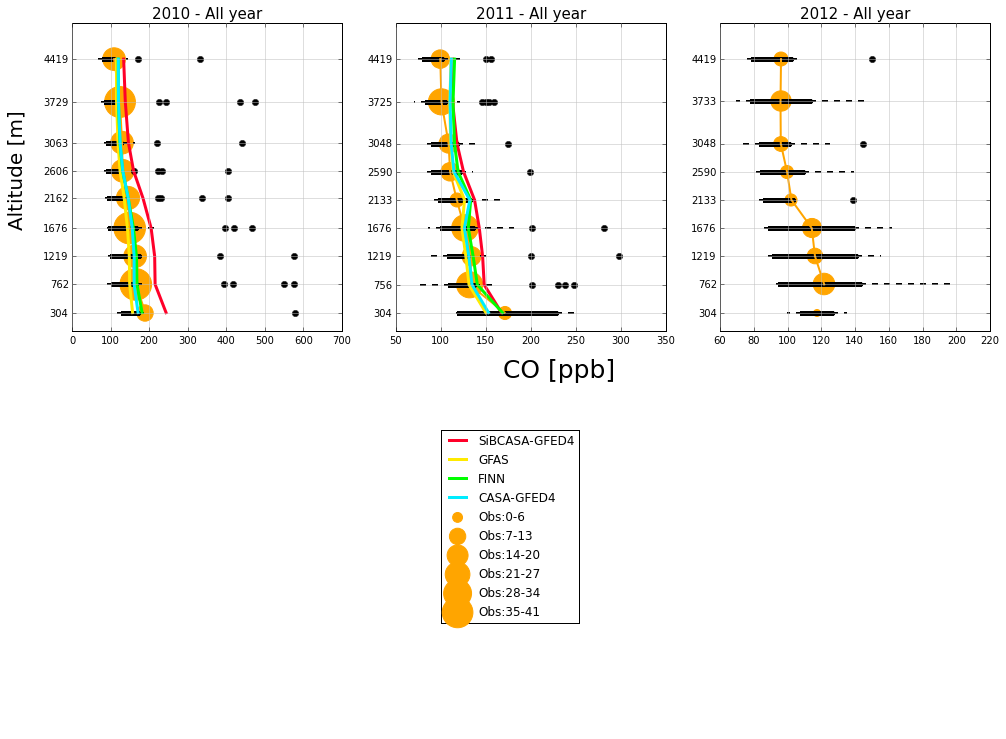

In [29]:
site = 'tab'
season  = 'wet'
minyear = 2010
maxyear = 2013 # Observations only until 2012
boxplot = True # False to plot errorbars


fig,axes = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(15,12))
subplots_adjust(left=0.05, bottom=0.08, right=None, top=None, wspace=None, hspace=0.3)
fig.text(-0.01, 0.73, 'Altitude [m]', va='center', rotation='vertical',fontsize=20)
fig.text(0.5, 0.49, 'CO [ppb]', ha='center',fontsize=25)

colors = plt.get_cmap('gist_rainbow')(np.linspace(0,1,6))
legend = ['SiBCASA-GFED4','GFAS','FINN','CASA-GFED4','CASA-GFED4-3h','Observations']

filas   = pd.Series(['SiBCASA-GFED4','GFAS','FINN','CASA-GFED4','CASA-GFED4-3h'])
df_all  = pd.DataFrame(np.zeros((5,5)),index=filas, columns=('2010','2011','2012','2013','2014'))
df_fire = pd.DataFrame(np.zeros((5,5)),index=filas, columns=('2010','2011','2012','2013','2014'))
df_wet  = pd.DataFrame(np.zeros((5,5)),index=filas, columns=('2010','2011','2012','2013','2014'))
         
for ii,dirbf in enumerate(directories):
    print ii,dirbf
    for fname in os.listdir(dirbf):
        print dirbf+fname
        f = cdf.Dataset(dirbf+fname)
        o = f.groups[site].groups['CO'].variables['obs_mix'][:]            
        s = f.groups[site].groups['CO'].variables['mod_mix'][:]
        a = f.groups[site].groups['CO'].variables['alt'][:]
        time = f.groups[site].groups['CO'].variables['dates'][:]            
    
        dates = []
        for i in time:
            dates.append(dt.datetime(*i))
        dates = np.array(dates)

        for y in range(minyear,maxyear):

            if season == 'all':
                date_min = dt.datetime(y,1,1)
                date_max = dt.datetime(y+1,1,1)
            if season == 'wet':
                date_min = dt.datetime(y,1,1)
                date_max = dt.datetime(y,8,1)
            if season == 'fire':
                date_min = dt.datetime(y,8,1)
                date_max = dt.datetime(y,12,1)

            d_index = np.where(np.logical_and(dates>=date_min,dates<date_max))

            obs = o[d_index]
            sim = s[d_index]
            alt = a[d_index]

            index_500 = np.where(alt<500)
            index_1000 = np.where(np.logical_and(alt>=500,alt<1000))
            index_1500 = np.where(np.logical_and(alt>=1000,alt<1500))
            index_2000 = np.where(np.logical_and(alt>=1500,alt<2000))
            index_2500 = np.where(np.logical_and(alt>=2000,alt<2500))
            index_3000 = np.where(np.logical_and(alt>=2500,alt<3000))
            index_3500 = np.where(np.logical_and(alt>=3000,alt<3500))
            index_4000 = np.where(np.logical_and(alt>=3500,alt<4000))
            index_4500 = np.where(np.logical_and(alt>=4000,alt<4500))

            indices = [index_500,index_1000,index_1500,index_2000,index_2500,index_3000,
                       index_3500,index_4000,index_4500]    

            obs_bin = [len(obs[index_500]), len(obs[index_1000]),  len(obs[index_1500]), 
                       len(obs[index_2000]), len(obs[index_2500]), len(obs[index_3000]),
                       len(obs[index_3500]), len(obs[index_4000]), len(obs[index_4500])]

            # activate to see the number of observations in each height per year
            #print y, obs_bin

            observations = []
            simulations = []
            error_low = []
            error_high = []
            obs_count = []
            altitude = []
            info_point2 = []

            for x in range(len(indices)):
                simulations.append((sim[indices[x]]).mean())
                observations.append((obs[indices[x]]).mean())
                if obs_bin[x] !=0:
                    error_low.append(np.median(obs[indices[x]]) - np.percentile(obs[indices[x]],25.0))
                    error_high.append(np.percentile(obs[indices[x]],75.0) - np.median(obs[indices[x]]))
                else:
                    error_low.insert(0,0)
                    error_high.insert(0,0)
                obs_count.append(len(obs[indices[x]]))   
                altitude.append(alt[indices[x]].mean())
                info_point2 += [[obs[indices[x]]]]

            if not season == 'fire': altitude = np.array([int(elem) for elem in altitude])
            if season == 'fire': altitude = np.array(altitude)
                
            observations = np.array(observations)

            if y == 2010: 
                    ax1 = plt.subplot(231)
                    sizes_arr = sizes_gen(site,season)[0]
                    ss = np.array([10*n for n in sizes_arr[0]])
                    if ii == 0:
                        for k,j in enumerate(sorted(set(ss))):
                            index = np.where(ss == j)            
                            ax1.scatter(observations[index], altitude[index], s=ss[index], color='orange')
                        if season == 'fire': plt.xlim(50, 400)
                        if season == 'wet': plt.xlim(0, 350)
                        if boxplot:
                            #ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                            bp = ax1.boxplot(info_point2,positions=altitude,vert=False)
                            for box in bp['boxes']:
                                box.set(color='black', linewidth=5)
                            for whisker in bp['whiskers']:
                                whisker.set(color='black', linewidth=2)
                            for cap in bp['caps']:
                                cap.set(color='black', linewidth=5)
                            #for median in bp['medians']:
                            #    median.set(color='black', linewidth=5)
                            for flier in bp['fliers']:
                                flier.set(marker='o', color='black', alpha=1)
                        else: 
                            ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                            #plt.xlim(384, 391) # Option 2 settings
                        ax1.legend(loc = 'upper right',scatterpoints = 1)
                    if season == 'all': df_all.loc[filas[ii],'%i'%(y)]   = rmse(sim,obs)
                    if season == 'wet': df_wet.loc[filas[ii],'%i'%(y)]   = rmse(sim,obs)
                    if season == 'fire': df_fire.loc[filas[ii],'%i'%(y)] = rmse(sim,obs)
                    #print y, rmse(simulations,observations)
                
            if y == 2011:

                ax1 = plt.subplot(232)
                sizes_arr = sizes_gen(site,season)[0]
                ss = np.array([10*n for n in sizes_arr[1]])
                if ii == 0:
                    for k,j in enumerate(sorted(set(ss))):
                        index = np.where(ss == j)            
                        ax1.scatter(observations[index], altitude[index], s=ss[index], color='orange')
                    if season == 'fire': plt.xlim(50, 400)
                    if season == 'wet': plt.xlim(0, 350)
                    if boxplot:
                        #ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                        bp = ax1.boxplot(info_point2,positions=altitude,vert=False)
                        for box in bp['boxes']:
                            box.set(color='black', linewidth=5)
                        for whisker in bp['whiskers']:
                            whisker.set(color='black', linewidth=2)
                        for cap in bp['caps']:
                            cap.set(color='black', linewidth=5)
                        #for median in bp['medians']:
                        #   median.set(color='black', linewidth=5)
                        for flier in bp['fliers']:
                            flier.set(marker='o', color='black', alpha=1)
                    else: 
                        ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                        #plt.xlim(383, 395)
                    ax1.legend(loc = 'upper left', scatterpoints = 1)
                if season == 'all': df_all.loc[filas[ii],'%i'%(y)]   = rmse(sim,obs)
                if season == 'wet': df_wet.loc[filas[ii],'%i'%(y)]   = rmse(sim,obs)
                if season == 'fire': df_fire.loc[filas[ii],'%i'%(y)] = rmse(sim,obs)
                #print y, rmse(simulations,observations)

            if y == 2012: 
                ax1 = plt.subplot(233)
                sizes_arr = sizes_gen(site,season)[0]
                ss = np.array([10*n for n in sizes_arr[2]])
                if ii == 0:
                    for k,j in enumerate(sorted(set(ss))):
                        index = np.where(ss == j)            
                        ax1.scatter(observations[index], altitude[index], s=ss[index], color='orange')
                    if season == 'fire': plt.xlim(50, 400)
                    if season == 'wet': plt.xlim(0, 350)
                    if boxplot:
                        #ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                        if season == 'fire':
                            alt_temp = list(altitude)
                            del info_point2[0]
                            del alt_temp[0]
                            bp = ax1.boxplot(info_point2,positions=alt_temp,vert=False)
                        if not season == 'fire': bp = ax1.boxplot(info_point2,positions=altitude,vert=False)
                        for box in bp['boxes']:
                            box.set(color='black', linewidth=5)
                        for whisker in bp['whiskers']:
                            whisker.set(color='black', linewidth=2)
                        for cap in bp['caps']:
                            cap.set(color='black', linewidth=5)
                        #for median in bp['medians']:
                        #    median.set(color='black', linewidth=5)
                        for flier in bp['fliers']:
                            flier.set(marker='o', color='black', alpha=1)
                    else: 
                        ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                        #plt.xlim(385, 417) # Option 2 settings
                    ax1.legend(loc = 'upper right',scatterpoints = 1)
                if season == 'all': df_all.loc[filas[ii],'%i'%(y)]   = rmse(sim,obs)
                if season == 'wet': df_wet.loc[filas[ii],'%i'%(y)]   = rmse(sim,obs)
                if season == 'fire': df_fire.loc[filas[ii],'%i'%(y)] = rmse(sim,obs)
                #print y, rmse(simulations,observations)
                
            if ii == 0: # this is to plot the errorbar just once to get it in the general legend
                #ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                if y == 2012: 
                    ax1.plot(observations[1:], altitude[1:],color='orange',label=legend[5],linewidth=2)   
                if not y == 2012: ax1.plot(observations, altitude,color='orange',label=legend[5],linewidth=2) # to plot obs for option 1

            if y == 2012 and season == 'fire': ax1.plot(simulations[1:],altitude[1:],'-',linewidth=3,color=colors[ii],label=legend[ii])
            if y == 2012 and season == 'wet': ax1.plot(simulations,altitude,'-',linewidth=3,color=colors[ii],label=legend[ii])    
            if not y == 2012: ax1.plot(simulations,altitude,'-',linewidth=3,color=colors[ii],label=legend[ii])
            
            #if ii == 0: # this is to plot the errorbar just once to get it in the general legend
                #ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
            #    ax1.plot(observations, altitude,color='orange',label=legend[5],linewidth=2) # to plot obs for option 1
            #ax1.plot(simulations,altitude,'-',linewidth=3,color=colors[ii],label=legend[ii])

            if season == 'all': ax1.set_title('%i - All year'%y,fontsize=15)
            if season == 'wet': ax1.set_title('%i - Wet Season'%y,fontsize=15)
            if season == 'fire': ax1.set_title('%i - Fire Season'%y,fontsize=15)

            ax1.grid(True, ls='-', color='0.75') # setting the grid and the color on a grey scale
            ax1.set_ylim(0,5000)
            
        t1 = [0]*9
        t2 = [0]*9
        ax1 = plt.subplot(236)
        ax1.tick_params(axis='x', which='both',bottom='off',top='off',labelbottom='off')
        ax1.tick_params(axis='y', which='both',left='off',right='off',labelleft='off')
        ax1.spines['right'].set_color('none')
        ax1.spines['left'].set_color('none')
        ax1.spines['bottom'].set_color('none')
        ax1.spines['top'].set_color('none')
        ax1 = plt.subplot(234)
        ax1.tick_params(axis='x', which='both',bottom='off',top='off',labelbottom='off')
        ax1.tick_params(axis='y', which='both',left='off',right='off',labelleft='off')
        ax1.spines['right'].set_color('none')
        ax1.spines['left'].set_color('none')
        ax1.spines['bottom'].set_color('none')
        ax1.spines['top'].set_color('none')
        ax1 = plt.subplot(235)
        ax1.plot(t1,t2,'-',linewidth=3,color=colors[ii],label=legend[ii])
        ax1.legend(loc='upper left')
        ax1.tick_params(axis='x', which='both',bottom='off',top='off',labelbottom='off')
        ax1.tick_params(axis='y', which='both',left='off',right='off',labelleft='off')
        ax1.spines['right'].set_color('none')
        ax1.spines['left'].set_color('none')
        ax1.spines['bottom'].set_color('none')
        ax1.spines['top'].set_color('none')

if season == 'all': df_all.to_pickle('TabCO_RMSE_all')
if season == 'wet': df_wet.to_pickle('TabCO_RMSE_wet')
if season == 'fire': df_fire.to_pickle('TabCO_RMSE_fire')            

indi, labels, x, y = legend_gen(site,season)
for g,inn in enumerate(indi):
    ax1.scatter(x*0, y*0, s=x[inn], color='orange', label = labels[g])
    ax1.legend(scatterpoints = 1,bbox_to_anchor=(0.7, 1))

#if season == 'wet': fig.savefig('Sim_tabCO_Wet.png',bbox_inches='tight',DPI=1000)
#if season == 'fire': fig.savefig('Sim_tabCO_Fire.png',bbox_inches='tight',DPI=1000)

# RIO BRANCO ALL YEAR, FIRE AND WET SEASONS


0 /Users/botia/mnt/promise/CO2/ingrid/co_fwd_runs/sibcasa-gfed4/
/Users/botia/mnt/promise/CO2/ingrid/co_fwd_runs/sibcasa-gfed4/gatti_points_apri.nc4
1 /Users/botia/mnt/promise/CO2/ingrid/co_fwd_runs/gfas/
/Users/botia/mnt/promise/CO2/ingrid/co_fwd_runs/gfas/gatti_points_apri.nc4
2 /Users/botia/mnt/promise/CO2/ingrid/co_fwd_runs/finn/
/Users/botia/mnt/promise/CO2/ingrid/co_fwd_runs/finn/gatti_points_apri.nc4
3 /Users/botia/mnt/promise/CO2/ingrid/co_fwd_runs/casa-gfed4/
/Users/botia/mnt/promise/CO2/ingrid/co_fwd_runs/casa-gfed4/gatti_points_apri.nc4
24 24


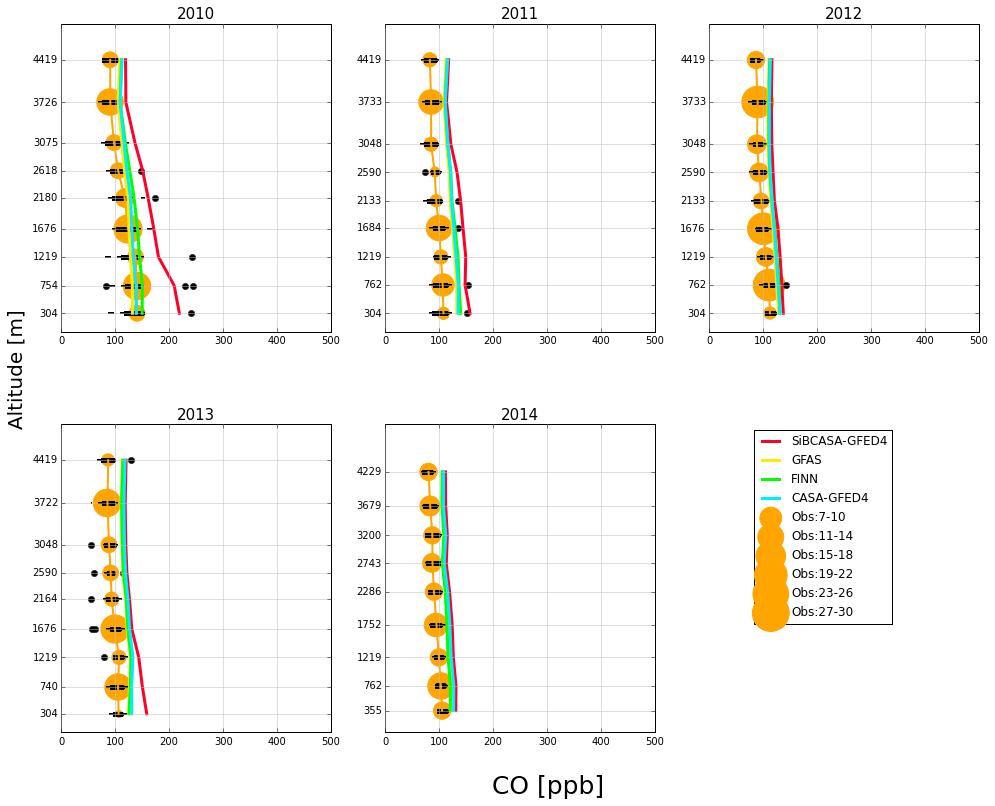

In [34]:
site = 'rba' #rba for Rio Branco
season  = 'wet'
minyear = 2010
maxyear = 2015
boxplot = True # False to plot errorbars

fig,axes = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(15,12))
subplots_adjust(left=0.05, bottom=0.08, right=None, top=None, wspace=None, hspace=0.3)
fig.text(0, 0.5, 'Altitude [m]', va='center', rotation='vertical',fontsize=20)
fig.text(0.5, 0.009, 'CO [ppb]', ha='center',fontsize=25)

colors = plt.get_cmap('gist_rainbow')(np.linspace(0,1,6))
legend = ['SiBCASA-GFED4','GFAS','FINN','CASA-GFED4','CASA-GFED4-3h','Observations']

filas   = pd.Series(['SiBCASA-GFED4','GFAS','FINN','CASA-GFED4'])
df_all  = pd.DataFrame(np.zeros((4,5)),index=filas, columns=('2010','2011','2012','2013','2014'))
df_fire = pd.DataFrame(np.zeros((4,5)),index=filas, columns=('2010','2011','2012','2013','2014'))
df_wet  = pd.DataFrame(np.zeros((4,5)),index=filas, columns=('2010','2011','2012','2013','2014'))

if season == 'fire': maxyear = 2014
for ii,dirbf in enumerate(directories):
    print ii,dirbf
    for fname in os.listdir(dirbf):
        print dirbf+fname
        f = cdf.Dataset(dirbf+fname)
        o = f.groups[site].groups['CO'].variables['obs_mix'][:]            
        s = f.groups[site].groups['CO'].variables['mod_mix'][:]
        a = f.groups[site].groups['CO'].variables['alt'][:]
        time = f.groups[site].groups['CO'].variables['dates'][:]
        
        dates = []
        for i in time:
            dates.append(dt.datetime(*i))
        dates = np.array(dates)

        for y in range(minyear,maxyear):
            if season == 'all':
                date_min = dt.datetime(y,1,1)
                date_max = dt.datetime(y+1,1,1)
            if season == 'wet':
                date_min = dt.datetime(y,1,1)
                date_max = dt.datetime(y,8,1)
            if season == 'fire':
                date_min = dt.datetime(y,8,1)
                date_max = dt.datetime(y,12,1)

            d_index = np.where(np.logical_and(dates>=date_min,dates<date_max))

            obs = o[d_index]
            sim = s[d_index]
            alt = a[d_index]
            
            index_4500_rmsd = np.where(alt<4500)
            
            index_500 = np.where(alt<500)
            index_1000 = np.where(np.logical_and(alt>=500,alt<1000))
            index_1500 = np.where(np.logical_and(alt>=1000,alt<1500))
            index_2000 = np.where(np.logical_and(alt>=1500,alt<2000))
            index_2500 = np.where(np.logical_and(alt>=2000,alt<2500))
            index_3000 = np.where(np.logical_and(alt>=2500,alt<3000))
            index_3500 = np.where(np.logical_and(alt>=3000,alt<3500))
            index_4000 = np.where(np.logical_and(alt>=3500,alt<4000))
            index_4500 = np.where(np.logical_and(alt>=4000,alt<4500))

            indices = [index_500,index_1000,index_1500,index_2000,index_2500,index_3000,
                       index_3500,index_4000,index_4500]    

            obs_bin = [len(obs[index_500]), len(obs[index_1000]),  len(obs[index_1500]), 
                       len(obs[index_2000]), len(obs[index_2500]), len(obs[index_3000]),
                       len(obs[index_3500]), len(obs[index_4000]), len(obs[index_4500])]

            # activate to see the number of observations in each height per year
            #print y, obs_bin

            observations = []
            simulations = []
            error_low = []
            error_high = []
            obs_count = []
            altitude = []
            info_point2 = []

            for x in range(len(indices)):
                simulations.append((sim[indices[x]]).mean())
                observations.append((obs[indices[x]]).mean())
                error_low.append(np.median(obs[indices[x]]) - np.percentile(obs[indices[x]],25.0))
                error_high.append(np.percentile(obs[indices[x]],75.0) - np.median(obs[indices[x]]))
                obs_count.append(len(obs[indices[x]]))   
                altitude.append(alt[indices[x]].mean())
                info_point2 += [[obs[indices[x]]]]

            altitude = np.array([int(elem) for elem in altitude])
            observations = np.array(observations)
                    
            if y == 2010: 
                ax1 = plt.subplot(231)
                sizes_arr = sizes_gen(site,season)[0]
                ss = np.array([10*n for n in sizes_arr[0]])
                if ii == 0:
                    for k,j in enumerate(sorted(set(ss))):
                        index = np.where(ss == j)            
                        ax1.scatter(observations[index], altitude[index], s=ss[index], color='orange')
                    if season == 'wet': plt.xlim(0, 500) # Option 3 settings
                    if season == 'fire': plt.xlim(100, 600)
                    if boxplot:
                        #ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                        bp = ax1.boxplot(info_point2,positions=altitude,vert=False)
                        for box in bp['boxes']:
                            box.set(color='black', linewidth=5)
                        for whisker in bp['whiskers']:
                            whisker.set(color='black', linewidth=2)
                        for cap in bp['caps']:
                            cap.set(color='black', linewidth=5)
                        #for median in bp['medians']:
                        #    median.set(color='black', linewidth=5)
                        for flier in bp['fliers']:
                            flier.set(marker='o', color='black', alpha=1)
                    else: 
                        ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                        #plt.xlim(386.5, 390.5) # Option 2 settings
                    ax1.legend(loc = 'upper left',scatterpoints = 1)
                if season == 'all': df_all.loc[filas[ii],'%i'%(y)]   = rmse(sim[index_4500_rmsd],obs[index_4500_rmsd])
                if season == 'fire': df_fire.loc[filas[ii],'%i'%(y)] = rmse(sim[index_4500_rmsd],obs[index_4500_rmsd])
                if season == 'wet': df_wet.loc[filas[ii],'%i'%(y)]   = rmse(sim[index_4500_rmsd],obs[index_4500_rmsd])
                
                #print y, rmse(simulations,observations)'''

            if y == 2011: 
                ax1 = plt.subplot(232)
                sizes_arr = sizes_gen(site,season)[0]
                ss = np.array([10*n for n in sizes_arr[1]])
                if ii == 0:
                    for k,j in enumerate(sorted(set(ss))):
                        index = np.where(ss == j)            
                        ax1.scatter(observations[index], altitude[index], s=ss[index], color='orange')
                    if season == 'wet': plt.xlim(0, 500) # option 3 settings
                    if season == 'fire': plt.xlim(0, 500)
                    if boxplot:
                        #ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                        bp = ax1.boxplot(info_point2,positions=altitude,vert=False)
                        for box in bp['boxes']:
                            box.set(color='black', linewidth=5)
                        for whisker in bp['whiskers']:
                            whisker.set(color='black', linewidth=2)
                        for cap in bp['caps']:
                            cap.set(color='black', linewidth=5)
                        #for median in bp['medians']:
                        #   median.set(color='black', linewidth=5)
                        for flier in bp['fliers']:
                            flier.set(marker='o', color='black', alpha=1)
                    else: 
                        ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                        #plt.xlim(388, 394)
                    ax1.legend(loc = 'upper right', scatterpoints = 1)
                if season == 'all': df_all.loc[filas[ii],'%i'%(y)]   = rmse(sim[index_4500_rmsd],obs[index_4500_rmsd])
                if season == 'fire': df_fire.loc[filas[ii],'%i'%(y)] = rmse(sim[index_4500_rmsd],obs[index_4500_rmsd])
                if season == 'wet': df_wet.loc[filas[ii],'%i'%(y)]   = rmse(sim[index_4500_rmsd],obs[index_4500_rmsd])
                #print y, rmse(simulations,observations)

            if y == 2012: 
                ax1 = plt.subplot(233)
                sizes_arr = sizes_gen(site,season)[0]
                ss = np.array([10*n for n in sizes_arr[2]])
                if ii == 0:
                    for k,j in enumerate(sorted(set(ss))):
                        index = np.where(ss == j)            
                        ax1.scatter(observations[index], altitude[index], s=ss[index], color='orange')
                    if season == 'wet': plt.xlim(0, 500) # option 3 settings
                    if season == 'fire': plt.xlim(0, 500)
                    if boxplot:
                        #ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                        bp = ax1.boxplot(info_point2,positions=altitude,vert=False)
                        for box in bp['boxes']:
                            box.set(color='black', linewidth=5)
                        for whisker in bp['whiskers']:
                            whisker.set(color='black', linewidth=2)
                        for cap in bp['caps']:
                            cap.set(color='black', linewidth=5)
                        #for median in bp['medians']:
                        #    median.set(color='black', linewidth=5)
                        for flier in bp['fliers']:
                            flier.set(marker='o', color='black', alpha=1)
                    else: 
                        ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                        #plt.xlim(391, 397) # Option 2 settings
                    ax1.legend(loc = 'upper right',scatterpoints = 1)
                if season == 'all': df_all.loc[filas[ii],'%i'%(y)]   = rmse(sim[index_4500_rmsd],obs[index_4500_rmsd])
                if season == 'fire': df_fire.loc[filas[ii],'%i'%(y)] = rmse(sim[index_4500_rmsd],obs[index_4500_rmsd])
                if season == 'wet': df_wet.loc[filas[ii],'%i'%(y)]   = rmse(sim[index_4500_rmsd],obs[index_4500_rmsd])
                #print y, rmse(simulations,observations)

            if y == 2013: 
                ax1 = plt.subplot(234)
                sizes_arr = sizes_gen(site,season)[0]
                ss = np.array([10*n for n in sizes_arr[3]])
                if ii == 0:
                    for k,j in enumerate(sorted(set(ss))):
                        index = np.where(ss == j)            
                        ax1.scatter(observations[index], altitude[index], s=ss[index], color='orange')
                    if season == 'wet': plt.xlim(0, 500) # settings options 3
                    if season == 'fire': plt.xlim(0, 500)
                    if boxplot:
                        #ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                        bp = ax1.boxplot(info_point2,positions=altitude,vert=False)
                        for box in bp['boxes']:
                            box.set(color='black', linewidth=5)
                        for whisker in bp['whiskers']:
                            whisker.set(color='black', linewidth=2)
                        for cap in bp['caps']:
                            cap.set(color='black', linewidth=5)
                        #for median in bp['medians']:
                        #    median.set(color='black', linewidth=5)
                        for flier in bp['fliers']:
                            flier.set(marker='o', color='black', alpha=1)
                    else: 
                        ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                        #plt.xlim(390, 398) # settings options 2
                    ax1.legend(loc = 'upper left',scatterpoints = 1)
                if season == 'all': df_all.loc[filas[ii],'%i'%(y)]   = rmse(sim[index_4500_rmsd],obs[index_4500_rmsd])
                if season == 'fire': df_fire.loc[filas[ii],'%i'%(y)] = rmse(sim[index_4500_rmsd],obs[index_4500_rmsd])
                if season == 'wet': df_wet.loc[filas[ii],'%i'%(y)]   = rmse(sim[index_4500_rmsd],obs[index_4500_rmsd])
                #print y, rmse(simulations,observations) 

            if y == 2014: 
                ax1 = plt.subplot(235)
                sizes_arr = sizes_gen(site,season)[0]
                ss = np.array([10*n for n in sizes_arr[4]])
                if ii == 0:
                    for k,j in enumerate(sorted(set(ss))):
                        index = np.where(ss == j)            
                        ax1.scatter(observations[index], altitude[index], s=ss[index], color='orange')
                    if season == 'wet': plt.xlim(0, 500) # settings for option 3
                    if boxplot:
                        #ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                        bp = ax1.boxplot(info_point2,positions=altitude,vert=False)
                        for box in bp['boxes']:
                            box.set(color='black', linewidth=5)
                        for whisker in bp['whiskers']:
                            whisker.set(color='black', linewidth=2)
                        for cap in bp['caps']:
                            cap.set(color='black', linewidth=5)
                        #for median in bp['medians']:
                        #    median.set(color='black', linewidth=5)
                        for flier in bp['fliers']:
                            flier.set(marker='o', color='black', alpha=1)
                    else: 
                        ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                        #plt.xlim(394, 402) # settings for option 2
                    ax1.legend(loc = 'upper right',scatterpoints = 1)
                if season == 'all': df_all.loc[filas[ii],'%i'%(y)]   = rmse(sim[index_4500_rmsd],obs[index_4500_rmsd])
                if season == 'fire': df_fire.loc[filas[ii],'%i'%(y)] = rmse(sim[index_4500_rmsd],obs[index_4500_rmsd])
                if season == 'wet': df_wet.loc[filas[ii],'%i'%(y)]   = rmse(sim[index_4500_rmsd],obs[index_4500_rmsd])
                #print y, rmse(simulations,observations)

            if ii == 0: # this is to plot the errorbar just once to get it in the general legend
                #ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                ax1.plot(observations, altitude,color='orange',label=legend[5],linewidth=2) # to plot obs for option 1
                #ax1.legend(scatterpoints=1) # legend for observations option 1 
            ax1.plot(simulations,altitude,'-',linewidth=3,color=colors[ii],label=legend[ii])
            
            if season == 'all': ax1.set_title('%i'%y,fontsize=15)
            if season == 'wet': ax1.set_title('%i'%y,fontsize=15)
            if season == 'fire': ax1.set_title('%i'%y,fontsize=15)
                
            ax1.grid(True, ls='-', color='0.75') # setting the grid and the color on a black scale
            ax1.set_ylim(0,5000)
        t1 = [0]*9
        t2 = [0]*9
        ax1 = plt.subplot(236)
        ax1.plot(t1,t2,'-',linewidth=3,color=colors[ii],label=legend[ii])
        ax1.legend(bbox_to_anchor=(0.7, 0.7))
        ax1.tick_params(axis='x', which='both',bottom='off',top='off',labelbottom='off')
        ax1.tick_params(axis='y', which='both',left='off',right='off',labelleft='off')
        ax1.spines['right'].set_color('none')
        ax1.spines['left'].set_color('none')
        ax1.spines['bottom'].set_color('none')
        ax1.spines['top'].set_color('none')

if season == 'all': df_all.to_pickle('RboCO_RMSE_all')
if season == 'wet': df_wet.to_pickle('RboCO_RMSE_wet')
if season == 'fire': df_fire.to_pickle('RboCO_RMSE_fire') 

indi, labels, x, y = legend_gen(site,season)
print size(x), size (y)
for g,inn in enumerate(indi):
    ax1.scatter(x*0, y*0, s = x[inn], color='orange', label = labels[g])
    ax1.legend(scatterpoints = 1,bbox_to_anchor=(0.7, 1))
#if season == 'wet': fig.savefig('Sim_rboCO_Wet.png',bbox_inches='tight',DPI=1000)
#if season == 'fire': fig.savefig('Sim_rboCO_Fire.png',bbox_inches='tight',DPI=1000)

# ALTA FLORESTA ALL YEAR, FIRE AND WET SEASON 
 - Box whiskers can be plotted as well as errorbars 
 - RMSE can also be calculated for each year


0 /Users/botia/mnt/promise/CO2/ingrid/co_fwd_runs/sibcasa-gfed4/
/Users/botia/mnt/promise/CO2/ingrid/co_fwd_runs/sibcasa-gfed4/gatti_points_apri.nc4
1 /Users/botia/mnt/promise/CO2/ingrid/co_fwd_runs/gfas/
/Users/botia/mnt/promise/CO2/ingrid/co_fwd_runs/gfas/gatti_points_apri.nc4
2 /Users/botia/mnt/promise/CO2/ingrid/co_fwd_runs/finn/
/Users/botia/mnt/promise/CO2/ingrid/co_fwd_runs/finn/gatti_points_apri.nc4
3 /Users/botia/mnt/promise/CO2/ingrid/co_fwd_runs/casa-gfed4/
/Users/botia/mnt/promise/CO2/ingrid/co_fwd_runs/casa-gfed4/gatti_points_apri.nc4
[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28]


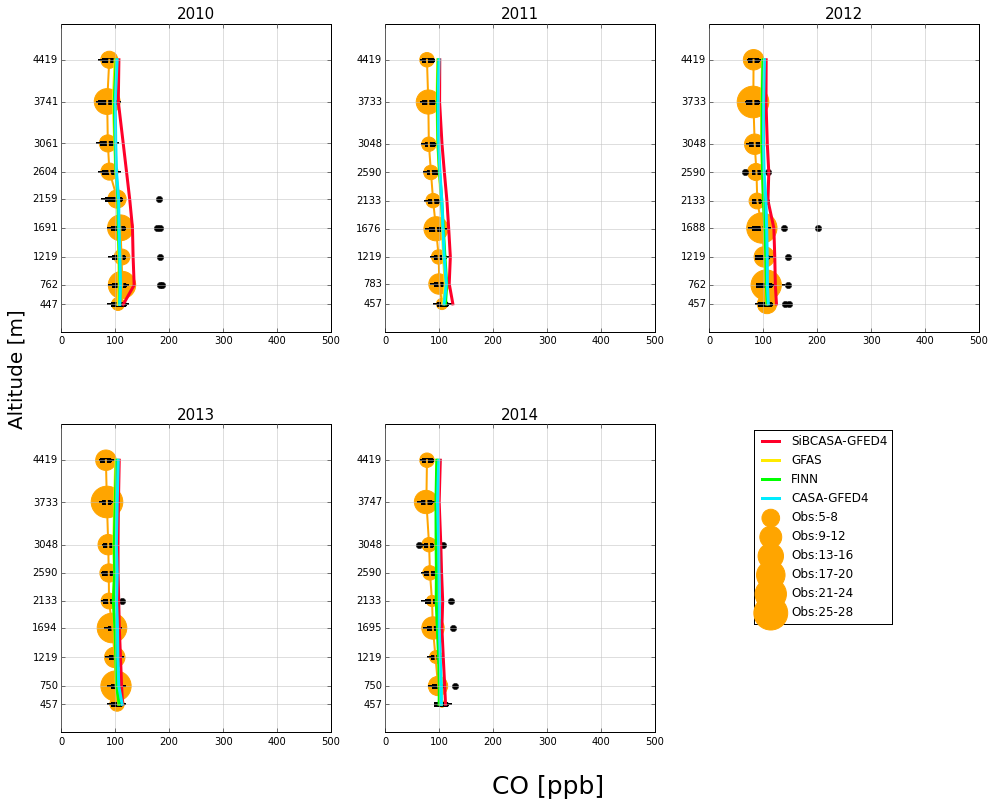

In [37]:
site    = 'alf'
season  = 'wet'

minyear = 2010
maxyear = 2015
boxplot = True # False to plot errorbars

fig,axes = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(15,12))
subplots_adjust(left=0.05, bottom=0.08, right=None, top=None, wspace=None, hspace=0.3)
fig.text(0, 0.5, 'Altitude [m]', va='center', rotation='vertical',fontsize=20)
fig.text(0.5, 0.009, 'CO [ppb]', ha='center',fontsize=25)

colors = plt.get_cmap('gist_rainbow')(np.linspace(0,1,6))
legend = ['SiBCASA-GFED4','GFAS','FINN','CASA-GFED4','CASA-GFED4-3h','Observations']

filas   = pd.Series(['SiBCASA-GFED4','GFAS','FINN','CASA-GFED4','CASA-GFED4-3h'])
df_all  = pd.DataFrame(np.zeros((5,5)),index=filas, columns=('2010','2011','2012','2013','2014'))
df_fire = pd.DataFrame(np.zeros((5,5)),index=filas, columns=('2010','2011','2012','2013','2014'))
df_wet  = pd.DataFrame(np.zeros((5,5)),index=filas, columns=('2010','2011','2012','2013','2014'))

if season == 'fire': maxyear = 2014
for ii,dirbf in enumerate(directories):
    print ii,dirbf
    for fname in os.listdir(dirbf):
        print dirbf+fname
        f = cdf.Dataset(dirbf+fname)
        o = f.groups[site].groups['CO'].variables['obs_mix'][:]            
        s = f.groups[site].groups['CO'].variables['mod_mix'][:]
        a = f.groups[site].groups['CO'].variables['alt'][:]
        time = f.groups[site].groups['CO'].variables['dates'][:]
            
        dates = []
        for i in time:
            dates.append(dt.datetime(*i))
        dates = np.array(dates)

        for y in range(minyear,maxyear):

            if season == 'all':
                date_min = dt.datetime(y,1,1)
                date_max = dt.datetime(y+1,1,1)
            if season == 'wet':
                date_min = dt.datetime(y,1,1)
                date_max = dt.datetime(y,8,1)
            if season == 'fire':
                date_min = dt.datetime(y,8,1)
                date_max = dt.datetime(y,12,1)

            d_index = np.where(np.logical_and(dates>=date_min,dates<date_max))

            obs = o[d_index]
            sim = s[d_index]
            alt = a[d_index]

            index_500 = np.where(alt<500)
            index_1000 = np.where(np.logical_and(alt>=500,alt<1000))
            index_1500 = np.where(np.logical_and(alt>=1000,alt<1500))
            index_2000 = np.where(np.logical_and(alt>=1500,alt<2000))
            index_2500 = np.where(np.logical_and(alt>=2000,alt<2500))
            index_3000 = np.where(np.logical_and(alt>=2500,alt<3000))
            index_3500 = np.where(np.logical_and(alt>=3000,alt<3500))
            index_4000 = np.where(np.logical_and(alt>=3500,alt<4000))
            index_4500 = np.where(np.logical_and(alt>=4000,alt<4500))

            indices = [index_500,index_1000,index_1500,index_2000,index_2500,index_3000,
                       index_3500,index_4000,index_4500]    

            obs_bin = [len(obs[index_500]), len(obs[index_1000]),  len(obs[index_1500]), 
                       len(obs[index_2000]), len(obs[index_2500]), len(obs[index_3000]),
                       len(obs[index_3500]), len(obs[index_4000]), len(obs[index_4500])]

            # activate to see the number of observations in each height per year
            #print y, obs_bin

            observations = []
            simulations = []
            error_low = []
            error_high = []
            obs_count = []
            altitude = []
            info_point2 = []

            for x in range(len(indices)):
                simulations.append((sim[indices[x]]).mean())
                observations.append((obs[indices[x]]).mean())
                if obs_bin[x] !=0:
                    error_low.append(np.median(obs[indices[x]]) - np.percentile(obs[indices[x]],25.0))
                    error_high.append(np.percentile(obs[indices[x]],75.0) - np.median(obs[indices[x]]))
                else:
                    error_low.insert(0,0)
                    error_high.insert(0,0)
                obs_count.append(len(obs[indices[x]]))   
                altitude.append(alt[indices[x]].mean())
                info_point2 += [[obs[indices[x]]]]

            if not season == 'fire': altitude = np.array([int(elem) for elem in altitude])
            if season == 'fire': altitude = np.around(altitude,decimals=0)
            
            observations = np.array(observations)
            
            if y == 2010: 
                ax1 = plt.subplot(231)
                ax1 = plt.subplot(231)
                sizes_arr = sizes_gen(site,season)[0]
                ss = np.array([10*n for n in sizes_arr[0]])
                if ii == 0:
                    for k,j in enumerate(sorted(set(ss))):
                        index = np.where(ss == j)            
                        ax1.scatter(observations[index], altitude[index], s=ss[index], color='orange')
                    if season == 'fire': plt.xlim(100, 600)
                    if season == 'wet': plt.xlim(0, 500)
                    if boxplot:
                        #ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                        bp = ax1.boxplot(info_point2,positions=altitude,vert=False)
                        for box in bp['boxes']:
                            box.set(color='black', linewidth=5)
                        for whisker in bp['whiskers']:
                            whisker.set(color='black', linewidth=2)
                        for cap in bp['caps']:
                            cap.set(color='black', linewidth=5)
                        #for median in bp['medians']:
                        #    median.set(color='black', linewidth=5)
                        for flier in bp['fliers']:
                            flier.set(marker='o', color='black', alpha=1)
                    else: 
                        ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                        #plt.xlim(383, 396) # Option 2 settings
                    ax1.legend(loc = 'upper left',scatterpoints = 1)
                if season == 'all': df_all.loc[filas[ii],'%i'%(y)]   = rmse(sim,obs)
                if season == 'wet': df_wet.loc[filas[ii],'%i'%(y)]   = rmse(sim,obs)
                if season == 'fire': df_fire.loc[filas[ii],'%i'%(y)] = rmse(sim,obs)
                #print ii,y, rmse(simulations,observations)

            if y == 2011: 
                ax1 = plt.subplot(232)
                ax1 = plt.subplot(232)
                sizes_arr = sizes_gen(site,season)[0]
                ss = np.array([10*n for n in sizes_arr[1]])
                if ii == 0:
                    for k,j in enumerate(sorted(set(ss))):
                        index = np.where(ss == j)            
                        ax1.scatter(observations[index], altitude[index], s=ss[index], color='orange')
                    if season == 'fire': plt.xlim(0, 500)
                    if season == 'wet': plt.xlim(0, 500)
                    if boxplot:
                        #ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                        bp = ax1.boxplot(info_point2,positions=altitude,vert=False)
                        for box in bp['boxes']:
                            box.set(color='black', linewidth=5)
                        for whisker in bp['whiskers']:
                            whisker.set(color='black', linewidth=2)
                        for cap in bp['caps']:
                            cap.set(color='black', linewidth=5)
                        #for median in bp['medians']:
                        #   median.set(color='black', linewidth=5)
                        for flier in bp['fliers']:
                            flier.set(marker='o', color='black', alpha=1)
                    else: 
                        ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                        #plt.xlim(387, 393)
                    ax1.legend(loc = 'upper right', scatterpoints = 1)
                if season == 'all': df_all.loc[filas[ii],'%i'%(y)]   = rmse(sim,obs)
                if season == 'wet': df_wet.loc[filas[ii],'%i'%(y)]   = rmse(sim,obs)
                if season == 'fire': df_fire.loc[filas[ii],'%i'%(y)] = rmse(sim,obs)
                #print y, rmse(simulations,observations)

            if y == 2012: 
                ax1 = plt.subplot(233)
                sizes_arr = sizes_gen(site,season)[0]
                ss = np.array([10*n for n in sizes_arr[2]])
                if ii == 0:
                    for k,j in enumerate(sorted(set(ss))):
                        index = np.where(ss == j)
                        ax1.scatter(observations[index], altitude[index], s=ss[index], color='orange')
                    if season == 'fire': plt.xlim(0, 500)
                    if season == 'wet': plt.xlim(0, 500)
                    if boxplot:
                        #ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                        bp = ax1.boxplot(info_point2,positions=altitude,vert=False)
                        for box in bp['boxes']:
                            box.set(color='black', linewidth=5)
                        for whisker in bp['whiskers']:
                            whisker.set(color='black', linewidth=2)
                        for cap in bp['caps']:
                            cap.set(color='black', linewidth=5)
                        #for median in bp['medians']:
                        #    median.set(color='black', linewidth=5)
                        for flier in bp['fliers']:
                            flier.set(marker='o', color='black', alpha=1)
                    else: 
                        ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                        #plt.xlim(389, 396) # Option 2 settings
                    ax1.legend(loc = 'upper right',scatterpoints = 1)
                if season == 'all': df_all.loc[filas[ii],'%i'%(y)]   = rmse(sim,obs)
                if season == 'wet': df_wet.loc[filas[ii],'%i'%(y)]   = rmse(sim,obs)
                if season == 'fire': df_fire.loc[filas[ii],'%i'%(y)] = rmse(sim,obs)
                #print y, rmse(simulations,observations)
            
            if y == 2013: 
                ax1 = plt.subplot(234)
                sizes_arr = sizes_gen(site,season)[0]
                ss = np.array([10*n for n in sizes_arr[3]])
                if ii == 0:
                    for k,j in enumerate(sorted(set(ss))):
                        index = np.where(ss == j)            
                        ax1.scatter(observations[index], altitude[index], s=ss[index], color='orange')
                    if season == 'fire': plt.xlim(0, 500)
                    if season == 'wet': plt.xlim(0, 500)                  
                    if boxplot:
                        #ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                        #bp = ax1.boxplot(info_point2,positions=altitude,vert=False)
                        if season == 'fire':
                            alt_temp = list(altitude)
                            print len(alt_temp), len(info_point2)
                            del info_point2[0]
                            del alt_temp[0]
                            print len(alt_temp), len(info_point2)
                            bp = ax1.boxplot(info_point2,positions=alt_temp,vert=False)
                        if not season == 'fire': bp = ax1.boxplot(info_point2,positions=altitude,vert=False)
                        for box in bp['boxes']:
                            box.set(color='black', linewidth=5)
                        for whisker in bp['whiskers']:
                            whisker.set(color='black', linewidth=2)
                        for cap in bp['caps']:
                            cap.set(color='black', linewidth=5)
                        #for median in bp['medians']:
                        #    median.set(color='black', linewidth=5)
                        for flier in bp['fliers']:
                            flier.set(marker='o', color='black', alpha=1)
                    else: 
                        ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                        #plt.xlim(390, 398) # settings options 2
                    ax1.legend(loc = 'upper left',scatterpoints = 1)
                if season == 'all': df_all.loc[filas[ii],'%i'%(y)]   = rmse(sim,obs)
                if season == 'wet': df_wet.loc[filas[ii],'%i'%(y)]   = rmse(sim,obs)
                if season == 'fire': df_fire.loc[filas[ii],'%i'%(y)] = rmse(sim,obs)
                #print y, rmse(simulations,observations) 
            
            if y == 2014: 
                ax1 = plt.subplot(235)
                sizes_arr = sizes_gen(site,season)[0]
                ss = np.array([10*n for n in sizes_arr[4]])
                if ii == 0:
                    for k,j in enumerate(sorted(set(ss))):
                        index = np.where(ss == j)            
                        ax1.scatter(observations[index], altitude[index], s=ss[index], color='orange')
                    plt.xlim(0, 500) 
                    if boxplot:
                        #ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                        bp = ax1.boxplot(info_point2,positions=altitude,vert=False)
                        for box in bp['boxes']:
                            box.set(color='black', linewidth=5)
                        for whisker in bp['whiskers']:
                            whisker.set(color='black', linewidth=2)
                        for cap in bp['caps']:
                            cap.set(color='black', linewidth=5)
                        #for median in bp['medians']:
                        #    median.set(color='black', linewidth=5)
                        for flier in bp['fliers']:
                            flier.set(marker='o', color='black', alpha=1)
                    else: 
                        ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                        #plt.xlim(391, 399) # settings for option 2
                    ax1.legend(loc = 'upper right',scatterpoints = 1)
                if season == 'all': df_all.loc[filas[ii],'%i'%(y)]   = rmse(sim,obs)
                if season == 'wet': df_wet.loc[filas[ii],'%i'%(y)]   = rmse(sim,obs)
                if season == 'fire': df_fire.loc[filas[ii],'%i'%(y)] = rmse(sim,obs)
                #print y, rmse(simulations,observations)
            
            if ii == 0: # this is to plot the errorbar just once to get it in the general legend
                #ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                if y == 2013: 
                    ax1.plot(observations[1:], altitude[1:],color='orange',label=legend[5],linewidth=2)   
                if not y == 2013: ax1.plot(observations, altitude,color='orange',label=legend[5],linewidth=2) # to plot obs for option 1

            if y == 2013 and season == 'fire': ax1.plot(simulations[1:],altitude[1:],'-',linewidth=3,color=colors[ii],label=legend[ii])
            if y == 2013 and season == 'wet': ax1.plot(simulations,altitude,'-',linewidth=3,color=colors[ii],label=legend[ii])    
            if not y == 2013: ax1.plot(simulations,altitude,'-',linewidth=3,color=colors[ii],label=legend[ii])

            if season == 'all': ax1.set_title('%i'%y,fontsize=15)
            if season == 'wet': ax1.set_title('%i'%y,fontsize=15)
            if season == 'fire': ax1.set_title('%i'%y,fontsize=15)

            ax1.grid(True, ls='-', color='0.75') # setting the grid and the color on a grey scale
            ax1.set_ylim(0,5000)
        t1 = [0]*9
        t2 = [0]*9
        ax1 = plt.subplot(236)
        ax1.plot(t1,t2,'-',linewidth=3,color=colors[ii],label=legend[ii])
        ax1.legend(bbox_to_anchor=(0.7, 0.7))
        ax1.tick_params(axis='x', which='both',bottom='off',top='off',labelbottom='off')
        ax1.tick_params(axis='y', which='both',left='off',right='off',labelleft='off')
        ax1.spines['right'].set_color('none')
        ax1.spines['left'].set_color('none')
        ax1.spines['bottom'].set_color('none')
        ax1.spines['top'].set_color('none')

if season == 'all': df_all.to_pickle('AlfCO_RMSE_all')
if season == 'wet': df_wet.to_pickle('AlfCO_RMSE_wet')
if season == 'fire': df_fire.to_pickle('AlfCO_RMSE_fire')
    
indi, labels, x, y = legend_gen(site,season)
for g,inn in enumerate(indi):
    ax1.scatter(x*0, y*0, s=x[inn], color='orange', label = labels[g])
    ax1.legend(scatterpoints = 1,bbox_to_anchor=(0.7, 1))
#if season == 'wet': fig.savefig('Sim_alfCO_Wet.png',bbox_inches='tight',DPI=1000)
#if season == 'fire': fig.savefig('Sim_alfCO_Fire.png',bbox_inches='tight',DPI=1000)

# Calculating a general RMSD
- This one is calculated with the mean simulated value and the mean observed value


In [30]:
site = 'alf'

for ii,dirbf in enumerate(directories):
    print ii,dirbf
    for fname in os.listdir(dirbf):
        print dirbf+fname
        f = cdf.Dataset(dirbf+fname)
        o = f.groups[site].groups['CO'].variables['obs_mix'][:]            
        s = f.groups[site].groups['CO'].variables['mod_mix'][:]
        a = f.groups[site].groups['CO'].variables['alt'][:]
        time = f.groups[site].groups['CO'].variables['dates'][:]
              
        dates = []
        for i in time:
            dates.append(dt.datetime(*i))
        dates   = np.array(dates)

        date_min = dt.datetime(2010,1,1)
        date_max = dt.datetime(2014,10,1)
        d_index = np.where(np.logical_and(dates>=date_min,dates<date_max))

        obs = o[d_index]
        sim = s[d_index]
        alt = a[d_index]

        
        # indices to group per altitude 
        index_500 = np.where(alt<500)
        index_1000 = np.where(np.logical_and(alt>=500,alt<1000))
        index_1500 = np.where(np.logical_and(alt>=1000,alt<1500))
        index_2000 = np.where(np.logical_and(alt>=1500,alt<2000))
        index_2500 = np.where(np.logical_and(alt>=2000,alt<2500))
        index_3000 = np.where(np.logical_and(alt>=2500,alt<3000))
        index_3500 = np.where(np.logical_and(alt>=3000,alt<3500))
        index_4000 = np.where(np.logical_and(alt>=3500,alt<4000))
        index_4500 = np.where(np.logical_and(alt>=4000,alt<4500))
        
        indices = [index_500,index_1000,index_1500,index_2000,index_2500,index_3000,index_3500,index_4000,index_4500]
        
        observations = []
        simulations = []
       
        for i in range(len(indices)):
            observations.append((obs[indices[i]]).mean())
            simulations.append((sim[indices[i]]).mean())

        if ii == 0:
            print '%s:SiBCASA-GFED4 RMSE = '%(site), rmse(simulations,observations)

        if ii == 1:
            print '%s:TAB:GFAS RMSE = '%(site), rmse(simulations,observations)

        if ii == 2:
            print '%s:FINN-GFED4 RMSE = '%(site), rmse(simulations,observations)

        if ii == 3:
            print '%s:CASA-GFED4 RMSE = '%(site), rmse(simulations,observations)

        if ii == 4:
            print '%s:CASA-GFED4-3h RMSE = '%(site), rmse(simulations,observations)


0 /Users/botia/mnt/promise/CO2/ingrid/co_fwd_runs/sibcasa-gfed4/
/Users/botia/mnt/promise/CO2/ingrid/co_fwd_runs/sibcasa-gfed4/gatti_points_apri.nc4
alf:SiBCASA-GFED4 RMSE =  15.1301339988
1 /Users/botia/mnt/promise/CO2/ingrid/co_fwd_runs/gfas/
/Users/botia/mnt/promise/CO2/ingrid/co_fwd_runs/gfas/gatti_points_apri.nc4
alf:TAB:GFAS RMSE =  14.3796040157
2 /Users/botia/mnt/promise/CO2/ingrid/co_fwd_runs/finn/
/Users/botia/mnt/promise/CO2/ingrid/co_fwd_runs/finn/gatti_points_apri.nc4
alf:FINN-GFED4 RMSE =  9.58970579016
3 /Users/botia/mnt/promise/CO2/ingrid/co_fwd_runs/casa-gfed4/
/Users/botia/mnt/promise/CO2/ingrid/co_fwd_runs/casa-gfed4/gatti_points_apri.nc4
alf:CASA-GFED4 RMSE =  12.588452633


# Calculating a general RMSD
- This one is general, only constrained by height. Everything below 4500m


In [36]:
site = 'tab'

altitude = [500,1000,1500,2000,2500,3000,3500,4000,4500]
legend=['SiBCASA-GFED4','GFAS','FINN','CASA-GFED4','CASA-GFED4-3h', 'Observations']


for ii,dirbf in enumerate(directories):
    print ii,dirbf
    for fname in os.listdir(dirbf):
        print dirbf+fname
        f = cdf.Dataset(dirbf+fname)
        o = f.groups[site].groups['CO'].variables['obs_mix'][:]            
        s = f.groups[site].groups['CO'].variables['mod_mix'][:]
        a = f.groups[site].groups['CO'].variables['alt'][:]
        time = f.groups[site].groups['CO'].variables['dates'][:]
              
        dates = []
        for i in time:
            dates.append(dt.datetime(*i))
        dates   = np.array(dates)

        date_min = dt.datetime(2010,1,1)
        date_max = dt.datetime(2014,10,1)
        d_index = np.where(np.logical_and(dates>=date_min,dates<date_max))

        obs = o[d_index]
        sim = s[d_index]
        alt = a[d_index]
        index_4500 = np.where(alt<4500)
        indices = [index_4500]

        observations = obs[index_4500]
        simulations = sim[index_4500]

        if ii == 0:
            print '%s:SiBCASA-GFED4 RMSE = '%(site), rmse(simulations,observations)

        if ii == 1:
            print '%s:TAB:GFAS RMSE = '%(site), rmse(simulations,observations)

        if ii == 2:
            print '%s:FINN-GFED4 RMSE = '%(site), rmse(simulations,observations)

        if ii == 3:
            print '%s:CASA-GFED4 RMSE = '%(site), rmse(simulations,observations)

        if ii == 4:
            print '%s:CASA-GFED4-3h RMSE = '%(site), rmse(simulations,observations)


0 /Users/botia/mnt/promise/CO2/ingrid/co_fwd_runs/sibcasa-gfed4/
/Users/botia/mnt/promise/CO2/ingrid/co_fwd_runs/sibcasa-gfed4/gatti_points_apri.nc4
tab:SiBCASA-GFED4 RMSE =  81.1961856912
1 /Users/botia/mnt/promise/CO2/ingrid/co_fwd_runs/gfas/
/Users/botia/mnt/promise/CO2/ingrid/co_fwd_runs/gfas/gatti_points_apri.nc4
tab:TAB:GFAS RMSE =  38.8264628248
2 /Users/botia/mnt/promise/CO2/ingrid/co_fwd_runs/finn/
/Users/botia/mnt/promise/CO2/ingrid/co_fwd_runs/finn/gatti_points_apri.nc4
tab:FINN-GFED4 RMSE =  36.3129609159
3 /Users/botia/mnt/promise/CO2/ingrid/co_fwd_runs/casa-gfed4/
/Users/botia/mnt/promise/CO2/ingrid/co_fwd_runs/casa-gfed4/gatti_points_apri.nc4
tab:CASA-GFED4 RMSE =  39.1963939157
